# Cryptolytic Arbitrage Model Evaluation and Selection

This notebook contains the code and analysis to select models with the best performance for the Cryptolytic project. You can find more information on data processing in this [notebook](https://github.com/Cryptolytic-app/cryptolytic/blob/master/modeling/arbitrage_data_processing.ipynb) and modeling in this [notebook](https://github.com/Cryptolytic-app/cryptolytic/blob/master/modeling/arbitrage_modeling.ipynb).

#### What is arbitrage?
Arbitrage occurs when there is a price difference between the same asset in two different markets. So with crypto, it’s possible to have the same coin priced differently on separate exchanges. For example with bitcoin, you might have bitcoin priced at &#0036;8,000 on one exchange, and at the same time that bitcoin can be priced at &#0036;8,100 on another exchange. You can buy the bitcoin on the first exchange for &#0036;8,000, send it to the other exchange, and sell it for &#0036;8,100. Now you’ve made &#0036;100 in profit and you can repeat this process as long as that arbitrage opportunity lasts.

#### Background on arbitrage models
There are many different combinations of arbitrage that could be occuring at any given moment among all the cryptocurrency exchanges. Our goal was to capture as many of these as possible in order to create an API that provides predictions for any arbitrage opportunities that will occur in the next 10 minutes. This API could then serve as the backend for a web application that displays the predictions in a more user-friendly format.

The arbitrage models in this notebook predict arbitrage 10 min before it happens, lasting for at least 30 mins. It's important that the arbitrage window lasts long enough because it takes time to move coins from one exchange to the other in order to successfully complete the arbitrage trades. The datasets used for modeling are generated by getting all of the combinations of 2 exchanges that support the same trading pair, engineering technical analysis features, merging that data on 'closing_time', engineering more features, and creating a target that signals an arbitrage opportunity. Arbitrage signals predicted by the models have a direction indicating which direction the arbitrage occurs in.

#### Modeling
There were 7 different types of models trained for each arbitrage combination which will be evaluated in this notebook:
- lr_bl: Logistic Regression baseline
- rf_bl: Random Forest baseline
- rf_25_feat: Random Forest with top 25 features
- rf_50_feat: Random Forest with top 50 features
- rf_75_feat: Random Forest with top 75 features
- rf_100_feat: Random Forest with top 100 features
- rf_hyper: Random Forest with top 75 features, 42 parameter combinations
Note: the most important features were determined by training the best baseline model `cbpro_bitfinex_ltc_usd` with all of the features and getting the feature importances from scikit learn.

Each arbitrage combination model set had 48 models.

#### Model Evaluation Criteria
After training the models, we exported a [csv](https://github.com/Cryptolytic-app/cryptolyticapp/blob/master/modeling/data/model_perf.csv) containing all of the performance metrics that could be used to select the best models:
<img src="https://github.com/Cryptolytic-app/cryptolyticapp/blob/master/assets/perf_df.png?raw=true"
     alt="drawing"
     width= 1000px; />

Since the training datasets contained imbalanced classes, accuracy score alone would not be a good measure of each model's performance. The additional features we used to evaluate the models were:
- Mean Percent Profit: the percent profit for executing arbitrage trades predicted in the test set averaged over all predictions 
- Precison: TP / (TP + FP), broken down by class (-1, 0, 1)
- Recall: TP / (TP + FN), broken down by class (-1, 0, 1) 
- Fall-Out (or FPR): FP / (TN + FP) for 0 class

#### Model Selection
From the 1300+ iterations of models trained, the models were narrowed down based on the following criteria:
- FPR less than 5%
- Precision greater than 96% for all classes (-1, 0, 1)
- Recall greater than 90% for all classes (-1, 0, 1)
- Predicted arbitrage correctly at least 100 times
- Mean percent profit greater than 0.5%

After filtering, we then sorted the models by precision and dropped duplicate models within each model set to get the best 15 models. The top 10 are shown below:
<img src="https://github.com/Cryptolytic-app/cryptolyticapp/blob/master/modeling/assets/top_models.png?raw=true"
     alt="drawing"
     width= 1000px; />
        
#### Visualizations
Model performance was visualized in two ways:
- **Portfolio Performance:** shows the change in portfolio value if you started with 10K and traded on all arbitrage predictions made by the model (given that each arbitrage trade has taken the time to fully execute so it simulates a more real world scenario, it will skip over trades that would be impossible to execute). Takes 0.55% in fees into consideration.
- **Model Predictions**: Visualizes the model's arbitrage predictions (from either exchange 1 to exchange 2 or vice versa) over the percent difference of the cryptocurrency between the two exchanges to show if the model is predicting the appropriate class.

##### Placeholder for Profit viz
<img src="https://github.com/Cryptolytic-app/cryptolyticapp/blob/master/modeling/assets/profit_viz.png?raw=true"
     alt="drawing"
     width= 1000px; />

##### Placeholder for Profit viz
<img src="https://github.com/Cryptolytic-app/cryptolyticapp/blob/master/modeling/assets/preds_viz.png?raw=true"
     alt="drawing"
     width= 1000px; />

#### Results and Discussion
write
<!-- 
Notes to myself:
For each of the models, show a dataframe of the LR scores, default RF scores, and hyperparm tuned RF scores.


There were 21 models that met the thresholds for model selection critera (details of these models can be found at the end of this nb). The final models were all profitable with gains anywhere from 0.2% - 2.3% within the varied testing time periods (Note: the model with >9% mean percent profit was an outlier). Visualizations for how these models performed can be viewed at https://github.com/Lambda-School-Labs/cryptolytic-ds/blob/master/finalized_notebooks/visualization/arb_performance_visualization.ipynb
 -->

#### Directory Structure
```
├── cryptolytic/                        <-- Root directory   
│   ├── modeling/                       <-- Directory for modeling work
│   │      │
│   │      ├──assets/                   <-- Directory with png assets used in notebooks
│   │      │
│   │      ├──data/                     <-- Directory containing all data for project
│   │      │   ├─ arb_data/             <-- Directory for train data after merging + FE pt.2
│   │      │   │   └── *.csv
│   │      │   │
│   │      │   ├─ arb_preds_test_data/  <-- Directory for test data w/ predictions
│   │      │   │   └── *.csv 
│   │      │   │
│   │      │   ├─ arb_top_data/         <-- Directory for data from the best models
│   │      │   │   └── *.csv
│   │      │   │
│   │      │   ├─ raw_data/             <-- Directory for raw training data
│   │      │   │   └── *.csv
│   │      │   │
│   │      │   ├─ ta_data/              <-- Directory for csv files after FE pt.1 
│   │      │   │   └── *.csv
│   │      │   │
│   │      │   ├─ raw_zip_data/         <-- Directory containing zip files of raw data
│   │      │   │   └── *.zip
│   │      │   │
│   │      │   ├─ all_features.txt      <-- All features used in baseline models
│   │      │   │
│   │      │   ├─ top_features.txt      <-- Most important features for models
│   │      │   │
│   │      │   ├─ model_perf.csv        <-- Data from training baseline models and tuning
│   │      │   │
│   │      │   ├─ top_model_perf.csv    <-- Data from retraining and exporting best models
│   │      │
│   │      ├── models/                  <-- Directory for all pickle models
│   │      │      └── *.pkl
│   │      │
│   │      ├─ 1_arbitrage_data_processing.ipynb  <-- NB for data processing and creating csv
│   │      │
│   │      ├─ 2_arbitrage_modeling.ipynb         <-- NB for baseline models and tuning
│   │      │
│   │      ├─ 3_arbitrage_model_evaluation.ipynb <-- NB for model selection, eval, and viz
│   │      │
│   │      ├─ trade_recommender_models.ipynb     <-- NB for trade recommender models
│   │      │
│   │      ├─ environment.yml                    <-- Contains project dependencies
│   │      │
│   │      ├─ utils.py                           <-- All the functions used in modeling
│   │      │

```

## Imports

In [ ]:
# to update your conda env from a yml file from terminal
# conda env update --file modeling/environment.yml

# to export yml from terminal(will get errors if you run it like this, only work on same builds/OS)
# conda env export > modeling/environment.yml

# this will work with different builds/OS but still had few errors on packages, commented them out in yml file
# conda env export --no-builds > modeling/environment.yml

In [1]:
import glob
import itertools
import json
import os
from pathlib import Path
import pickle
import shutil
from zipfile import ZipFile

import warnings
warnings.filterwarnings("ignore")
import ast

import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
pd.set_option('display.max_rows', 100000)
pd.set_option('display.max_columns', 100000)
import seaborn as sns

# from ta import add_all_ta_features

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
# # from sklearn.metrics import precision_recall_fscore_support
# # from sklearn.metrics import precision_score, recall_score,  roc_auc_score
# # from sklearn.metrics import accuracy_score, f1_score, 
# from sklearn.metrics import classification_report
# from sklearn.metrics import confusion_matrix
# from sklearn.model_selection import ParameterGrid

# from utils import tbl_stats_headings, print_model_name
# from utils import get_higher_closing_price, get_close_shift, get_profit, profit
# from utils import create_pg
# from utils import model_names
# from utils import ttsplit
# from utils import model_eval
from utils import create_models
# from utils import ALL_FEATURES

## Data

#### Training Data

Load all the arbitrage datasets that will be used in retraining and exporting the best models after they're selected.

In [2]:
with open ('data/train_data_paths.txt', 'rb') as fp:
    train_data_paths = pickle.load(fp)
print(len(train_data_paths)) # 15
train_data_paths

15


['data/arb_data/bitfinex_cbpro_etc_usd.csv',
 'data/arb_data/cbpro_bitfinex_ltc_usd.csv',
 'data/arb_data/hitbtc_cbpro_eth_usdc.csv',
 'data/arb_data/cbpro_bitfinex_eth_usd.csv',
 'data/arb_data/bitfinex_hitbtc_bch_usdt.csv',
 'data/arb_data/gemini_bitfinex_bch_btc.csv',
 'data/arb_data/gemini_hitbtc_bch_btc.csv',
 'data/arb_data/cbpro_gemini_bch_btc.csv',
 'data/arb_data/kraken_gemini_bch_btc.csv',
 'data/arb_data/bitfinex_cbpro_btc_usd.csv',
 'data/arb_data/gemini_kraken_ltc_btc.csv',
 'data/arb_data/bitfinex_hitbtc_ltc_usdt.csv',
 'data/arb_data/gemini_bitfinex_ltc_btc.csv',
 'data/arb_data/gemini_hitbtc_ltc_btc.csv',
 'data/arb_data/gemini_cbpro_ltc_btc.csv']

Each dataset should look like this...

In [3]:
pd.read_csv(train_data_paths[1], index_col=0).head()

,open_exchange_1,high_exchange_1,low_exchange_1,close_exchange_1,base_volume_exchange_1,nan_ohlcv_exchange_1,volume_adi_exchange_1,volume_obv_exchange_1,volume_cmf_exchange_1,volume_fi_exchange_1,volume_em_exchange_1,volume_vpt_exchange_1,volume_nvi_exchange_1,volatility_atr_exchange_1,volatility_bbh_exchange_1,volatility_bbl_exchange_1,volatility_bbm_exchange_1,volatility_bbhi_exchange_1,volatility_bbli_exchange_1,volatility_kcc_exchange_1,volatility_kch_exchange_1,volatility_kcl_exchange_1,volatility_kchi_exchange_1,volatility_kcli_exchange_1,volatility_dch_exchange_1,volatility_dcl_exchange_1,volatility_dchi_exchange_1,volatility_dcli_exchange_1,trend_macd_exchange_1,trend_macd_signal_exchange_1,trend_macd_diff_exchange_1,trend_ema_fast_exchange_1,trend_ema_slow_exchange_1,trend_adx_exchange_1,trend_adx_pos_exchange_1,trend_adx_neg_exchange_1,trend_vortex_ind_pos_exchange_1,trend_vortex_ind_neg_exchange_1,trend_vortex_diff_exchange_1,trend_trix_exchange_1,trend_mass_index_exchange_1,trend_cci_exchange_1,trend_dpo_exchange_1,trend_kst_exchange_1,trend_kst_sig_exchange_1,trend_kst_diff_exchange_1,trend_ichimoku_a_exchange_1,trend_ichimoku_b_exchange_1,trend_visual_ichimoku_a_exchange_1,trend_visual_ichimoku_b_exchange_1,trend_aroon_up_exchange_1,trend_aroon_down_exchange_1,trend_aroon_ind_exchange_1,momentum_rsi_exchange_1,momentum_mfi_exchange_1,momentum_tsi_exchange_1,momentum_uo_exchange_1,momentum_stoch_exchange_1,momentum_stoch_signal_exchange_1,momentum_wr_exchange_1,momentum_ao_exchange_1,momentum_kama_exchange_1,others_dr_exchange_1,others_dlr_exchange_1,others_cr_exchange_1,closing_time,open_exchange_2,high_exchange_2,low_exchange_2,close_exchange_2,base_volume_exchange_2,nan_ohlcv_exchange_2,volume_adi_exchange_2,volume_obv_exchange_2,volume_cmf_exchange_2,volume_fi_exchange_2,volume_em_exchange_2,volume_vpt_exchange_2,volume_nvi_exchange_2,volatility_atr_exchange_2,volatility_bbh_exchange_2,volatility_bbl_exchange_2,volatility_bbm_exchange_2,volatility_bbhi_exchange_2,volatility_bbli_exchange_2,volatility_kcc_exchange_2,volatility_kch_exchange_2,volatility_kcl_exchange_2,volatility_kchi_exchange_2,volatility_kcli_exchange_2,volatility_dch_exchange_2,volatility_dcl_exchange_2,volatility_dchi_exchange_2,volatility_dcli_exchange_2,trend_macd_exchange_2,trend_macd_signal_exchange_2,trend_macd_diff_exchange_2,trend_ema_fast_exchange_2,trend_ema_slow_exchange_2,trend_adx_exchange_2,trend_adx_pos_exchange_2,trend_adx_neg_exchange_2,trend_vortex_ind_pos_exchange_2,trend_vortex_ind_neg_exchange_2,trend_vortex_diff_exchange_2,trend_trix_exchange_2,trend_mass_index_exchange_2,trend_cci_exchange_2,trend_dpo_exchange_2,trend_kst_exchange_2,trend_kst_sig_exchange_2,trend_kst_diff_exchange_2,trend_ichimoku_a_exchange_2,trend_ichimoku_b_exchange_2,trend_visual_ichimoku_a_exchange_2,trend_visual_ichimoku_b_exchange_2,trend_aroon_up_exchange_2,trend_aroon_down_exchange_2,trend_aroon_ind_exchange_2,momentum_rsi_exchange_2,momentum_mfi_exchange_2,momentum_tsi_exchange_2,momentum_uo_exchange_2,momentum_stoch_exchange_2,momentum_stoch_signal_exchange_2,momentum_wr_exchange_2,momentum_ao_exchange_2,momentum_kama_exchange_2,others_dr_exchange_2,others_dlr_exchange_2,others_cr_exchange_2,year,month,day,higher_closing_price,pct_higher,arbitrage_opportunity,window_length,arbitrage_opportunity_shift,window_length_shift,target
0,3.7,3.7,3.7,3.7,5.0,0.0,19.605746,0.0,0.0,0.0,0.0,-4.533988,1000.0,0.298117,3.7,3.7,3.7,0.0,0.0,3.7,3.7,3.7,0.0,1.0,3.7,3.7,0.0,0.0,0.0,0.0,0.0,3.7,3.7,0.0,0.0,0.0,1.0,1.0,0.0,-94.542712,0.0,0.0,64.102832,-945.430008,-945.430008,0.000000e+00,3.7,3.7,67.781274,67.754441,4.0,4.0,0.0,50.0,50.0,-100.0,0.0,50.0,50.0,-50.0,0.0,3.7,-94.543001,0.0,0.0,2016-08-17 04:25:00,3.59,3.59,3.59,3.59,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,10292.576908,0.000288,3.593480,3.584200,3.58884,0.0,0.0,3.59,3.59,3.59,0.0,0.0,3.59,3.5842,1.0,0.0,0.000784,0.000650,0.000134,3.589609,3.588825,58.872704,47.913772,17.846626,1.321429,-0.25,1.571429,0.003211,1

#### Model Performance Data

Load the performance data that was exported after model training ([link to csv on GH](https://github.com/Cryptolytic-app/cryptolyticapp/blob/master/modeling/data/model_perf.csv)).

In [226]:
# # # delete this cell later
# perf2 = pd.read_csv('data/model_perf_test.csv')
# print(perf2.shape)
# perf2.head()

# perf_df = pd.read_csv('data/model_perf.csv')
# perf_df = perf_df.rename(columns={'FPR': 'fpr'})
# perf1 = perf_df[perf_df['model_label'] =='rf_hyper']
# perf_new = perf2.append(perf1, sort=False)
# print(perf_new.shape)

# perf_new = pd.merge(perf_new, dist_df, on='csv_name')
# print(perf_new.shape) # (1305, 23)
# # perf_new.head()


# perf_new.to_csv('data/model_perf_new.csv', index=False)
perf_df = pd.read_csv('data/model_perf_new.csv')
print(perf_df.shape)
perf_df.head()

(1350, 23)


,model_id,csv_name,model_label,params,accuracy,pct_profit_mean,pct_profit_median,fpr,correct_arb_neg1,correct_arb_1,correct_arb,precision_neg1,precision_0,precision_1,recall_neg1,recall_0,recall_1,f1_neg1,f1_0,f1_1,pct_class_1,pct_class_neg1,pct_class_0
0,bitfinex_cbpro_etc_usd_lr_bl,bitfinex_cbpro_etc_usd,lr_bl,{},0.946330,0.61,-0.06,0.003470,11,380,391,0.011236,0.996530,0.637584,0.423077,0.948627,0.857788,0.021891,0.971988,0.731473,0.07,0.36,0.57
1,bitfinex_cbpro_etc_usd_rf_bl,bitfinex_cbpro_etc_usd,rf_bl,{},0.966563,1.04,0.05,0.005429,2,342,344,0.004535,0.994571,0.604240,0.076923,0.971314,0.772009,0.008565,0.982805,0.677899,0.07,0.36,0.57
2,bitfinex_cbpro_etc_usd_rf_100_feat,bitfinex_cbpro_etc_usd,rf_100_feat,{},0.960003,0.68,-0.07,0.011466,2,206,208,0.003339,0.988534,0.712803,0.076923,0.970532,0.465011,0.006400,0.979450,0.562842,0.07,0.36,0.57
3,bitfinex_cbpro_etc_usd_rf_75_feat,bitfinex_cbpro_etc_usd,rf_75_feat,{},0.966946,1.17,0.07,0.008619,1,271,272,0.002033,0.991381,0.750693,0.038462,0.974835,0.611738,0.003861,0.983038,0.674129,0.07,0.36,0.57
4,bitfinex_cbpro_etc_usd_rf_50_feat,bitfinex_cbpro_etc_usd,rf_50_feat,{},0.933595,0.30,-0.16,0.012632,6,182,188,0.004996,0.987368,0.679104,0.230769,0.944454,0.410835,0.009780,0.965435,0.511955,0.07,0.36,0.57


In [183]:
perf_df = pd.read_csv('data/model_perf.csv')
print(perf_df.shape) # (1305, 20)
perf_df.head()


# delete this later
# its for finding the inf

# gemini_hitbtc_ltc_btc_rf_bl
# inf_value = perf_df[(perf_df['model_id'] == 'gemini_hitbtc_ltc_btc_rf_bl')]['FPR'].values[0]
# perf_df[perf_df['FPR'] == inf_value]
# perf_df[(perf_df['csv_name'] == 'gemini_cbpro_ltc_btc') & (perf_df['model_label'] == 'rf_bl')]

(1305, 20)


,model_id,csv_name,model_label,params,accuracy,pct_profit_mean,pct_profit_median,FPR,correct_arb_neg1,correct_arb_1,correct_arb,precision_neg1,precision_0,precision_1,recall_neg1,recall_0,recall_1,f1_neg1,f1_0,f1_1
0,cbpro_gemini_bch_btc_rf_hyper_auto_17_100,cbpro_gemini_bch_btc,rf_hyper,"{'max_depth': 17, 'max_features': 'auto', 'n_e...",0.979234,1.55,1.19,0.029314,228,437,665,1.0,0.970686,0.997717,0.919355,0.999314,0.947939,0.957983,0.984792,0.972191
1,cbpro_gemini_bch_btc_rf_hyper_auto_17_150,cbpro_gemini_bch_btc,rf_hyper,"{'max_depth': 17, 'max_features': 'auto', 'n_e...",0.978772,1.56,1.19,0.030585,223,440,663,1.0,0.969415,1.000000,0.899194,1.000000,0.954447,0.946921,0.984470,0.976693
2,cbpro_gemini_bch_btc_rf_hyper_50_17_100,cbpro_gemini_bch_btc,rf_hyper,"{'max_depth': 17, 'max_features': 50, 'n_estim...",0.998616,1.50,1.14,0.002053,248,458,706,1.0,0.997947,1.000000,1.000000,1.000000,0.993492,1.000000,0.998972,0.996736
3,cbpro_gemini_bch_btc_rf_hyper_50_17_150,cbpro_gemini_bch_btc,rf_hyper,"{'max_depth': 17, 'max_features': 50, 'n_estim...",0.998616,1.50,1.14,0.002053,248,458,706,1.0,0.997947,1.000000,1.000000,1.000000,0.993492,1.000000,0.998972,0.996736
4,cbpro_gemini_bch_btc_rf_hyper_55_17_100,cbpro_gemini_bch_btc,rf_hyper,"{'max_depth': 17, 'max_features': 55, 'n_estim...",0.999077,1.50,1.13,0.001370,248,459,707,1.0,0.998630,1.000000,1.000000,1.000000,0.995662,1.000000,0.999315,0.997826


Merge this with the class distribution data ([link to csv on GH](https://github.com/Cryptolytic-app/cryptolyticapp/blob/master/modeling/data/class_distribution.csv)).

In [181]:
dist_df = pd.read_csv('data/class_distribution.csv')
dist_df = dist_df.rename(columns={
    'arbitrage_combination': 'csv_name',
    'ex1_to_ex2_arb': 'pct_class_1',
    'ex2_to_ex1_arb': 'pct_class_neg1',
    'no_arb': 'pct_class_0'
})

perf_df = pd.merge(perf_df, dist_df, on='csv_name')
print(perf_df.shape) # (1290, 23)
perf_df.head()

(1305, 26)


,model_id,csv_name,model_label,params,accuracy,pct_profit_mean,pct_profit_median,FPR,correct_arb_neg1,correct_arb_1,correct_arb,precision_neg1,precision_0,precision_1,recall_neg1,recall_0,recall_1,f1_neg1,f1_0,f1_1,pct_class_1_x,pct_class_neg1_x,pct_class_0_x,pct_class_1_y,pct_class_neg1_y,pct_class_0_y
0,bitfinex_cbpro_etc_usd_lr_bl,bitfinex_cbpro_etc_usd,lr_bl,{},0.946330,0.61,-0.06,0.003470,11,380,391,0.011236,0.996530,0.637584,0.423077,0.948627,0.857788,0.021891,0.971988,0.731473,0.07,0.36,0.57,0.07,0.36,0.57
1,bitfinex_cbpro_etc_usd_rf_bl,bitfinex_cbpro_etc_usd,rf_bl,{},0.966563,1.04,0.05,0.005429,2,342,344,0.004535,0.994571,0.604240,0.076923,0.971314,0.772009,0.008565,0.982805,0.677899,0.07,0.36,0.57,0.07,0.36,0.57
2,bitfinex_cbpro_etc_usd_rf,bitfinex_cbpro_etc_usd,rf,{},0.949099,0.55,-0.13,0.010633,2,228,230,0.002469,0.989367,0.603175,0.076923,0.958449,0.514673,0.004785,0.973663,0.555420,0.07,0.36,0.57,0.07,0.36,0.57
3,bitfinex_cbpro_etc_usd_rf_hyper_auto_17_100,bitfinex_cbpro_etc_usd,rf_hyper,"{'max_depth': 17, 'max_features': 'auto', 'n_e...",0.999233,2.71,1.49,0.000782,22,429,451,1.000000,0.999218,1.000000,0.846154,1.000000,0.968397,0.916667,0.999609,0.983945,0.07,0.36,0.57,0.07,0.36,0.57
4,bitfinex_cbpro_etc_usd_rf_hyper_auto_17_150,bitfinex_cbpro_etc_usd,rf_hyper,"{'max_depth': 17, 'max_features': 'auto', 'n_e...",0.999276,2.70,1.48,0.000738,22,430,452,1.000000,0.999262,1.000000,0.846154,1.000000,0.970655,0.916667,0.999631,0.985109,0.07,0.36,0.57,0.07,0.36,0.57


Now we have a dataframe of performance metrics from 1305 models to choose from. These models are broken down by:
- 15 arbitrage combinations
    - 7 model labels:
        - lr_bl: 
        - rf_bl:
        - rf_25_feat:
        - rf_50_feat:
        - rf_75_feat:
        - rf_100_feat:
        - rf_hyper: 42 different hyperparameter combinations

## Model Selection

In [261]:
def model_selection(df):
    """
    
    """ 
    # filter for models that meet evaluation criteria
    temp_df = df[df['fpr'] < 0.05]
    temp_df = temp_df[temp_df['precision_1'] > 0.96]
    temp_df = temp_df[temp_df['precision_0'] > 0.96]
    temp_df = temp_df[temp_df['precision_neg1'] > 0.96]
    temp_df = temp_df[temp_df['recall_1'] > 0.9]
    temp_df = temp_df[temp_df['recall_0'] > 0.9]
    temp_df = temp_df[temp_df['recall_neg1'] > 0.9]
    temp_df = temp_df[temp_df['correct_arb'] > 100]
    temp_df = temp_df[temp_df['pct_profit_mean'] > 0.5]
    
    top_models_df = temp_df.sort_values(
        by=['precision_0', 'precision_1', 'precision_neg1'], 
        ascending=True
    )
    top_models_df = top_models_df.drop_duplicates(subset=['csv_name'])
    
    # keep default lr/rf for each good model and the best one
    # from rf hyper
    top_model_sets = temp_df['csv_name'].to_list()
    bl_df = df[df['csv_name'].isin(top_model_sets)]
    bl_df = bl_df.sort_values(
        by=['precision_0', 'precision_1', 'precision_neg1'], 
        ascending=True
    )
    bl_df = bl_df.drop_duplicates(
        subset=['csv_name', 'model_label'])
    
    # feature to indicate whether the row is the top model from that set
    tm = top_models_df['model_id'].to_list()
    bl_df['top_model'] = [1 if m in tm else 0 for m in bl_df['model_id']]
    
    # add , 'pct_profit_mean' back into sort
    return top_models_df, bl_df

In [293]:
top_models_df, baseline_df = model_selection(perf_df)

In [294]:
baseline_df = baseline_df.sort_values(
    by=['csv_name', 'pct_profit_mean'], 
    ascending=False
)
print(len(baseline_df)) # 90 models
baseline_df.head()
baseline_df

105


,model_id,csv_name,model_label,params,accuracy,pct_profit_mean,pct_profit_median,fpr,correct_arb_neg1,correct_arb_1,correct_arb,precision_neg1,precision_0,precision_1,recall_neg1,recall_0,recall_1,f1_neg1,f1_0,f1_1,pct_class_1,pct_class_neg1,pct_class_0,top_model
726,kraken_gemini_bch_btc_rf_hyper_auto_17_100,kraken_gemini_bch_btc,rf_hyper,"{'max_depth': 17, 'max_features': 'auto', 'n_e...",0.983318,1.00,0.37,0.021518,199,286,485,1.000000,0.978482,1.000000,0.880531,1.000000,0.969492,0.936471,0.989124,0.984509,0.14,0.14,0.71,0
720,kraken_gemini_bch_btc_lr_bl,kraken_gemini_bch_btc,lr_bl,{},0.868397,0.80,0.31,0.071519,202,205,407,0.668874,0.928481,0.742754,0.893805,0.896151,0.694915,0.765152,0.912030,0.718039,0.14,0.14,0.71,0
721,kraken_gemini_bch_btc_rf_bl,kraken_gemini_bch_btc,rf_bl,{},0.767841,0.75,0.27,0.227447,0,47,47,0.000000,0.772553,0.635135,0.000000,0.983506,0.159322,0.000000,0.865359,0.254743,0.14,0.14,0.71,0
722,kraken_gemini_bch_btc_rf_100_feat,kraken_gemini_bch_btc,rf_100_feat,{},0.715014,0.13,-0.15,0.247030,0,22,22,0.000000,0.752970,0.159420,0.000000,0.929139,0.074576,0.000000,0.831829,0.101617,0.14,0.14,0.71,0
725,kraken_gemini_bch_btc_rf_25_feat,kraken_gemini_bch_btc,rf_25_feat,{},0.619555,-0.17,-0.15,0.272423,0,31,31,0.000000,0.727577,0.085399,0.000000,0.797801,0.105085,0.000000,0.761072,0.094225,0.14,0.14,0.71,0
723,kraken_gemini_bch_btc_rf_75_feat,kraken_gemini_bch_btc,rf_75_feat,{},0.556070,-0.19,-0.27,0.293617,0,38,38,0.000000,0.706383,0.074219,0.000000,0.709835,0.128814,0.000000,0.708105,0.094176,0.14,0.14,0.71,0
724,kraken_gemini_bch_btc_rf_50_feat,kraken_gemini_bch_btc,rf_50_feat,{},0.411029,-0.23,-0.26,0.357251,0,36,36,0.000000,0.642749,0.043165,0.000000,0.519853,0.122034,0.000000,0.574806,0.063773,0.14,0.14,0.71,0
180,hitbtc_cbpro_eth_usdc_lr_bl,hitbtc_cbpro_eth_usdc,lr_bl,{},0.776962,1.29,1.25,0.252966,2048,1799,3847,0.855830,0.747034,0.853821,0.694944,0.931071,0.464978,0.767041,0.828961,0.602075,0.17,0.17,0.66,0
187,hitbtc_cbpro_eth_usdc_rf_hyper_auto_17_150,hitbtc_cbpro_eth_usdc,rf_hyper,"{'max_depth': 17, 'max_features': 'auto', 'n_e...",0.998335,1.02,0.79,0.002864,2945,3844,6789,1.000000,0.997136,1.000000,0.999321,1.000000,0.993538,0.999661,0.998566,0.996759,0.17,0.17,0.66,1
182,hitbtc_cbpro_eth_usdc_rf_100_feat,hitbtc_cbpro_eth_usdc,rf_100_feat,{},0.707097,0.93,0.75,0.312157,999,1947,2946,0.757392,0.687843,0.775697,0.338989,0.906393,0.503231,0.468354,0.782138,0.610441,0.17,0.17,0.66,0


In [295]:
top_models_df = top_models_df.sort_values(
    by=['pct_profit_mean'], 
    ascending=False
)
print(len(top_models_df))  # 15 models
top_models_df

# # export as csv 
# top_models_df.to_csv('data/top_models.csv', index=False)

15


,model_id,csv_name,model_label,params,accuracy,pct_profit_mean,pct_profit_median,fpr,correct_arb_neg1,correct_arb_1,correct_arb,precision_neg1,precision_0,precision_1,recall_neg1,recall_0,recall_1,f1_neg1,f1_0,f1_1,pct_class_1,pct_class_neg1,pct_class_0
111,cbpro_bitfinex_ltc_usd_rf_hyper_auto_19_150,cbpro_bitfinex_ltc_usd,rf_hyper,"{'max_depth': 19, 'max_features': 'auto', 'n_e...",0.999425,3.06,3.75,0.000650,362,6665,7027,1.000000,0.999350,1.0,0.914141,1.000000,0.999850,0.955145,0.999675,0.999925,0.24,0.12,0.64
8,bitfinex_cbpro_etc_usd_rf_hyper_50_17_100,bitfinex_cbpro_etc_usd,rf_hyper,"{'max_depth': 17, 'max_features': 50, 'n_estim...",1.000000,2.64,1.46,0.000000,26,443,469,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.07,0.36,0.57
278,cbpro_bitfinex_eth_usd_rf_hyper_50_17_100,cbpro_bitfinex_eth_usd,rf_hyper,"{'max_depth': 17, 'max_features': 50, 'n_estim...",1.000000,2.33,1.40,0.000000,449,11030,11479,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.21,0.12,0.67
817,bitfinex_cbpro_btc_usd_rf_hyper_auto_17_150,bitfinex_cbpro_btc_usd,rf_hyper,"{'max_depth': 17, 'max_features': 'auto', 'n_e...",0.999040,2.13,1.99,0.001433,27122,412,27534,0.999963,0.998567,1.0,0.998822,0.999981,0.901532,0.999392,0.999274,0.948216,0.08,0.19,0.73
665,cbpro_gemini_bch_btc_rf_hyper_auto_21_150,cbpro_gemini_bch_btc,rf_hyper,"{'max_depth': 21, 'max_features': 'auto', 'n_e...",0.976927,1.57,1.21,0.033156,224,435,659,1.000000,0.966844,1.0,0.903226,1.000000,0.943601,0.949153,0.983142,0.970982,0.15,0.16,0.70
547,gemini_hitbtc_bch_btc_rf_hyper_auto_17_150,gemini_hitbtc_bch_btc,rf_hyper,"{'max_depth': 17, 'max_features': 'auto', 'n_e...",0.976937,1.53,1.17,0.033535,433,244,677,1.000000,0.966465,1.0,0.941304,1.000000,0.913858,0.969765,0.982947,0.954990,0.16,0.14,0.69
470,gemini_bitfinex_bch_btc_rf_hyper_auto_19_100,gemini_bitfinex_bch_btc,rf_hyper,"{'max_depth': 19, 'max_features': 'auto', 'n_e...",0.982003,1.44,1.10,0.025802,488,243,731,0.995918,0.974198,1.0,0.956863,0.998570,0.941860,0.976000,0.986234,0.970060,0.16,0.16,0.68
187,hitbtc_cbpro_eth_usdc_rf_hyper_auto_17_150,hitbtc_cbpro_eth_usdc,rf_hyper,"{'max_depth': 17, 'max_features': 'auto', 'n_e...",0.998335,1.02,0.79,0.002864,2945,3844,6789,1.000000,0.997136,1.0,0.999321,1.000000,0.993538,0.999661,0.998566,0.996759,0.17,0.17,0.66
728,kraken_gemini_bch_btc_rf_hyper_50_17_100,kraken_gemini_bch_btc,rf_hyper,"{'max_depth': 17, 'max_features': 50, 'n_estim...",0.999537,0.95,0.34,0.000611,226,294,520,1.000000,0.999389,1.0,1.000000,1.000000,0.996610,1.000000,0.999695,0.998302,0.14,0.14,0.71
380,bitfinex_hitbtc_bch_usdt_rf_hyper_auto_19_100,bitfinex_hitbtc_bch_usdt,rf_hyper,"{'max_depth': 19, 'max_features': 'auto', 'n_e...",0.998129,0.94,0.59,0.002822,1188,2417,3605,1.000000,0.997178,1.0,0.993311,1.000000,0.995060,0.996644,0.998587,0.997524,0.19,0.14,0.67


In [296]:
# print the params since we can't see in df
print('Best Models\' Parameters:')
for params in top_models_df['params'].values:
      print(params)

Best Models' Parameters:
{'max_depth': 19, 'max_features': 'auto', 'n_estimators': 150}
{'max_depth': 17, 'max_features': 50, 'n_estimators': 100}
{'max_depth': 17, 'max_features': 50, 'n_estimators': 100}
{'max_depth': 17, 'max_features': 'auto', 'n_estimators': 150}
{'max_depth': 21, 'max_features': 'auto', 'n_estimators': 150}
{'max_depth': 17, 'max_features': 'auto', 'n_estimators': 150}
{'max_depth': 19, 'max_features': 'auto', 'n_estimators': 100}
{'max_depth': 17, 'max_features': 'auto', 'n_estimators': 150}
{'max_depth': 17, 'max_features': 50, 'n_estimators': 100}
{'max_depth': 19, 'max_features': 'auto', 'n_estimators': 100}
{'max_depth': 17, 'max_features': 50, 'n_estimators': 100}
{'max_depth': 17, 'max_features': 'auto', 'n_estimators': 150}
{'max_depth': 17, 'max_features': 'auto', 'n_estimators': 100}
{'max_depth': 19, 'max_features': 'auto', 'n_estimators': 150}
{'max_depth': 21, 'max_features': 'auto', 'n_estimators': 100}


## Retrain and Export Best Models

In [306]:
def train_best_models(df, feature_sets):
    """
    """
    top_models = df['model_id'].to_list()
    
    for model_id in top_models:
        print(f'\n{model_id}')
        filename = df[df['model_id'] == model_id]['csv_name'].values[0]
        filepath = f'data/arb_data/{filename}.csv'
        model_label = df[df['model_id'] == model_id]['model_label'].values[0]
        params = df[df['model_id'] == model_id]['params'].values[0]
        params = ast.literal_eval(params)
        print('model_label:', model_label)
        print('params:', params)
        
        # params are not in the right format when pulling from df
        # changing to a dict with iterable keys
        if params:
            for key in params:
                if isinstance(params[key], list):
                    params[key] = params[key]
                else:
                    params[key] = [params[key]]

        # duplicate csv data to new folder for easy export from sagemaker
        shutil.copyfile(filepath, f'data/arb_top_data/{filename}.csv')
        print('csv_copied!')

        # model type and features
        if model_label == 'lr_bl':
            features = feature_sets['bl']
            model = LogisticRegression(
                solver='lbfgs', 
                multi_class='multinomial'
            )
        else: # rf models
#             if model_label == 'rf_bl':
            features = feature_sets[model_label.replace('rf_', '')]
#             elif model_label == 'rf_25_feat':
#                 features = feature_sets['25_feat']
#             elif model_label == 'rf_50_feat':
#                 features = feature_sets['50_feat']
#             elif model_label == 'rf_100_feat':
#                 features = feature_sets['100_feat']
#             else: #hyper
#                 features = feature_sets['feat75']
            model = RandomForestClassifier(
                n_jobs=-1,
                random_state=42
            )
        
        # train and export top model
        create_models(
            train_data_paths=[filepath],
            model_type=model,
            features=features,
            param_grid=params,
            filename='data/top_model_perf.csv',
            export_preds=True,
            export_model=True
        )
        
        # train and export bl model
        create_models(
            train_data_paths=[filepath],
            model_type=LogisticRegression(
                solver='lbfgs', 
                multi_class='multinomial'
            ),
            features=feature_sets['bl'],
            param_grid={},
            filename='data/top_model_perf.csv',
            export_preds=True,
            export_model=True
        )

#### Load Features from JSON file

In [307]:
with open('data/features.txt') as json_file:
    feature_sets = json.load(json_file)
feature_sets.keys()

dict_keys(['baseline', 'all', 'feat100', 'feat75', 'feat50', 'feat25'])

In [308]:
feature_sets = {
    'bl': feature_sets['baseline'],
    'hyper': feature_sets['feat75'],
    'all': feature_sets['all'],
    '25_feat': feature_sets['feat25'],
    '50_feat': feature_sets['feat50'],
    '75_feat': feature_sets['feat75'],
    '100_feat': feature_sets['feat100'],
}

#### Testing

In [312]:
train_best_models(top_models_df[5:], feature_sets)


gemini_hitbtc_bch_btc_rf_hyper_auto_17_150
model_label: rf_hyper
params: {'max_depth': 17, 'max_features': 'auto', 'n_estimators': 150}
csv_copied!


 -------------------------------------------------------------------------------------------------------- 

 Model 1/1: gemini_hitbtc_bch_btc 
 --------------------------------------------------------------------------------------------------------
             train and test shape:  (5847, 141) (2168, 141)
             ----------------------------------------------------------------- 
              Model 1/1 
              params={'max_depth': 17, 'max_features': 'auto', 'n_estimators': 150} 
              -----------------------------------------------------------------
             percent profit mean: 1.07
             percent profit median: 0.84 


           Predicted -1  Predicted 0  Predicted 1
Actual -1           263          197            0
Actual 0            107         1331            3
Actual 1              0          228 

In [20]:
top_model_perf_df = pd.read_csv('data/top_model_perf.csv')
top_model_perf_df

# there is only 9 not 10 bc the top model for one of them is 
# lr bl. hopefully that gets fixed with hyperparameter tuning

,model_id,csv_name,model_label,params,accuracy,pct_profit_mean,pct_profit_median,FPR,correct_arb_neg1,correct_arb_1,correct_arb,precision_neg1,precision_0,precision_1,recall_neg1,recall_0,recall_1,f1_neg1,f1_0,f1_1
0,cbpro_bitfinex_ltc_usd_rf_hyper_auto_25_100,cbpro_bitfinex_ltc_usd,rf_hyper,"{'max_depth': 25, 'max_features': 'auto', 'n_e...",0.760779,0.88,0.01,0.011896,1,6531,6532,0.052632,0.988104,0.317054,0.002525,0.739238,0.979748,0.004819,0.845743,0.479076
1,cbpro_bitfinex_ltc_usd_lr_bl,cbpro_bitfinex_ltc_usd,lr_bl,{},0.957346,4.51,5.04,0.044642,208,4343,4551,0.722222,0.955358,0.998620,0.525253,0.998402,0.651515,0.608187,0.976406,0.788561
2,bitfinex_cbpro_etc_usd_rf_hyper_auto_25_150,bitfinex_cbpro_etc_usd,rf_hyper,"{'max_depth': 25, 'max_features': 'auto', 'n_e...",0.965541,1.06,0.00,0.008109,2,282,284,0.003831,0.991891,0.726804,0.076923,0.972879,0.636569,0.007299,0.982293,0.678700
3,bitfinex_cbpro_etc_usd_lr_bl,bitfinex_cbpro_etc_usd,lr_bl,{},0.946330,0.61,-0.06,0.003470,11,380,391,0.011236,0.996530,0.637584,0.423077,0.948627,0.857788,0.021891,0.971988,0.731473
4,bitfinex_cbpro_btc_usd_lr_bl,bitfinex_cbpro_btc_usd,lr_bl,{},0.835886,2.57,2.22,0.195640,14327,324,14651,0.979825,0.804360,0.796069,0.527620,0.992956,0.708972,0.685896,0.888763,0.750000
5,cbpro_bitfinex_eth_usd_rf_hyper_auto_40_100,cbpro_bitfinex_eth_usd,rf_hyper,"{'max_depth': 40, 'max_features': 'auto', 'n_e...",0.962049,2.46,1.43,0.030783,0,9785,9785,0.000000,0.969217,0.924771,0.000000,0.985295,0.887126,0.000000,0.977190,0.905557
6,cbpro_bitfinex_eth_usd_lr_bl,cbpro_bitfinex_eth_usd,lr_bl,{},0.858255,1.51,1.14,0.097918,161,5858,6019,0.851852,0.902082,0.605728,0.358575,0.929062,0.531097,0.504702,0.915374,0.565963
7,gemini_bitfinex_bch_btc_rf_hyper_auto_19_100,gemini_bitfinex_bch_btc,rf_hyper,"{'max_depth': 19, 'max_features': 'auto', 'n_e...",0.535764,0.29,-0.05,0.336894,323,31,354,0.353392,0.663106,0.861111,0.633333,0.576841,0.120155,0.453652,0.616972,0.210884
8,gemini_bitfinex_bch_btc_lr_bl,gemini_bitfinex_bch_btc,lr_bl,{},0.818643,1.16,0.76,0.093548,453,197,650,0.682229,0.906452,0.749049,0.888235,0.803431,0.763566,0.771721,0.851838,0.756238


#### End of testing

In [31]:
train_best_models(top_models_df)


cbpro_bitfinex_eth_usd_rf
model_label: rf
params 1: {}
params 2: {}
csv_copied
rf, no feat
1 no params
pg_list [{}]
read feat
data/arb_data/cbpro_bitfinex_eth_usd.csv


 --------------------------------------------------------------------------------------------------------------------- 

 Model 1/1: cbpro_bitfinex_eth_usd 
 ---------------------------------------------------------------------------------------------------------------------
             train and test shape:  (294869, 141) (65611, 141)
             ----------------------------------------------------------------- 
              Model 1/1 
              params=None 
              -----------------------------------------------------------------
             percent profit mean: 2.5
             percent profit median: 1.46 


           Predicted -1  Predicted 0  Predicted 1
Actual -1            38          411            0
Actual 0              0        54077           55
Actual 1              0          617        104

In [32]:
top_model_perf_df = pd.read_csv('top_model_perf.csv')
top_model_perf_df

,model_id,csv_name,model_label,params,accuracy,pct_profit_mean,pct_profit_median,FPR,correct_arb_neg1,correct_arb_1,correct_arb,precision_neg1,precision_0,precision_1,recall_neg1,recall_0,recall_1,f1_neg1,f1_0,f1_1
0,cbpro_bitfinex_eth_usd_rf,cbpro_bitfinex_eth_usd,rf,{},0.983494,2.50,1.46,0.018655,38,10413,10451,1.000000,0.981345,0.994746,0.084633,0.998984,0.944062,0.156057,0.990086,0.968741
1,cbpro_bitfinex_eth_usd_rf_hyper_auto_17_100,cbpro_bitfinex_eth_usd,rf_hyper,"{'max_depth': 17, 'max_features': 'auto', 'n_e...",0.992608,2.41,1.42,0.008844,92,10904,10996,1.000000,0.991156,0.999817,0.204900,0.999963,0.988577,0.340111,0.995540,0.994165
2,cbpro_bitfinex_eth_usd_rf_hyper_50_17_100,cbpro_bitfinex_eth_usd,rf_hyper,"{'max_depth': 17, 'max_features': 50, 'n_estim...",1.000000,2.33,1.40,0.000000,449,11030,11479,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
3,cbpro_bitfinex_eth_usd_lr,cbpro_bitfinex_eth_usd,lr,{},0.168127,0.13,-0.22,0.000000,0,11030,11030,0.000000,1.000000,0.168115,0.000000,0.000018,1.000000,0.000000,0.000037,0.287839
4,cbpro_gemini_bch_btc_lr,cbpro_gemini_bch_btc,lr,{},0.706507,2.55,2.41,0.288186,32,59,91,0.470588,0.711814,0.776316,0.129032,0.987654,0.127983,0.202532,0.827348,0.219739
5,cbpro_gemini_bch_btc_rf,cbpro_gemini_bch_btc,rf,{},0.932164,1.57,1.32,0.091589,147,415,562,1.000000,0.908411,1.000000,0.592742,1.000000,0.900217,0.744304,0.952008,0.947489
6,cbpro_gemini_bch_btc_rf_hyper_auto_17_100,cbpro_gemini_bch_btc,rf_hyper,"{'max_depth': 17, 'max_features': 'auto', 'n_e...",0.979234,1.55,1.19,0.029314,228,437,665,1.000000,0.970686,0.997717,0.919355,0.999314,0.947939,0.957983,0.984792,0.972191
7,cbpro_gemini_bch_btc_rf_hyper_50_17_100,cbpro_gemini_bch_btc,rf_hyper,"{'max_depth': 17, 'max_features': 50, 'n_estim...",0.998616,1.50,1.14,0.002053,248,458,706,1.000000,0.997947,1.000000,1.000000,1.000000,0.993492,1.000000,0.998972,0.996736
8,gemini_hitbtc_ltc_btc_rf,gemini_hitbtc_ltc_btc,rf,{},0.982987,0.56,0.54,0.019241,409,537,946,1.000000,0.980759,1.000000,0.853862,1.000000,0.886139,0.921171,0.990286,0.939633
9,gemini_hitbtc_ltc_btc_rf_hyper_auto_17_100,gemini_hitbtc_ltc_btc,rf_hyper,"{'max_depth': 17, 'max_features': 'auto', 'n_e...",0.996573,0.54,0.50,0.003936,462,595,1057,1.000000,0.996064,1.000000,0.964509,1.000000,0.981848,0.981934,0.998028,0.990841


In [ ]:
# 4
# download from sagemaker:
#     - all models
#     - all good arb csv
#     - all arb preds csv
#     - performance csv

#### Baseline Comparison Metrics

- improvement from logistic regression baseline to random forest baseline
- improvement from adding features ( random forest baseline to random forest all features)
- imporovement from hyperparameter tuning (random forest all features to random forest hyper)

In [235]:
def get_diffs(df):
    """
    Calculate the performance difference between 4 different model
    sets to see the impact between different modeling algorithms,
    adding technical analyisis features, and hyperparameter tuning.
    
    Parameters
    __________
    df: a dataframe containing all of the performance metrics from the
        models trained for each arbitrage combination ('lr_bl', 'rf_bl',
        'rf', 'rf_hyper'). Only the best model is included from hyper-
        parameter tuning
    
    Return
    ______
    df: 
    """
    df = df.copy()
    model_sets = set(df['csv_name'].to_list())
    labels = set(df['model_label'].to_list())
    metrics = ['accuracy', 'pct_profit_mean', 'precision_neg1', 'precision_0',
               'precision_1', 'recall_neg1', 'recall_0', 'recall_1']
    features_dict = {}
    for model_set in model_sets:
        temp_dict = {}
        set_df = df[df['csv_name'] == model_set] 
        rows = set_df.index.to_list()
        labels_dict = {}
        for label in labels:
            data = set_df[set_df['model_label'] == label]
            metric_dict = {
                'accuracy': data['accuracy'].values[0],
                'pct_profit_mean': data['pct_profit_mean'].values[0],
                'precision_neg1': data['precision_neg1'].values[0],
                'precision_0': data['precision_0'].values[0],
                'precision_1': data['precision_1'].values[0],
                'recall_neg1': data['recall_neg1'].values[0],
                'recall_0': data['recall_0'].values[0],
                'recall_1': data['recall_1'].values[0],
            }
            labels_dict[label] = metric_dict
        for i in rows:
            comp_dict = {}
            types = {
                'bl': ['lr_bl', 'rf_bl', set_df['model_label'].loc[i] == 'rf_bl'],
#                 'all_feat': ['rf_bl', 'rf', set_df['model_label'].loc[i] == 'rf'],
                '25_feat': ['rf_bl', 'rf_25_feat', set_df['model_label'].loc[i] == 'rf_25_feat'], 
                '50_feat': ['rf_bl', 'rf_50_feat', set_df['model_label'].loc[i] == 'rf_50_feat'], 
                '75_feat': ['rf_bl', 'rf_75_feat', set_df['model_label'].loc[i] == 'rf_75_feat'], 
                '100_feat': ['rf_bl', 'rf_100_feat', set_df['model_label'].loc[i] == 'rf_100_feat'], 
                'hyper': ['rf_bl', 'rf_hyper', set_df['model_label'].loc[i] == 'rf_hyper'],
                'bl_top': ['lr_bl', set_df['model_label'].loc[i], set_df['top_model'].loc[i] == 1]
            }
            for t in types:
                for metric in metrics:
                    comp_dict[f'{t}_{metric}_diff'] = (
                        ( labels_dict[types[t][1]][metric] - labels_dict[types[t][0]][metric] )
                        / np.abs(labels_dict[types[t][0]][metric]) if types[t][2] else np.nan
                    )

            temp_dict[i] = comp_dict
        features_dict = {**features_dict, **temp_dict}
    
    feat_df = pd.DataFrame(features_dict).transpose()
    df = pd.merge(df, feat_df, left_index=True, right_index=True)
        
    return df

In [236]:
# top_models = top_models_df['model_id'].to_list()
# diff_df = get_diffs(baseline_df, top_models)
diff_df = get_diffs(baseline_df)

In [241]:
diff_df.sort_values(by='model_label')

nums = [25, 50, 75, 100]
for n in nums:
    print(f'\n{n} features')
    columns = [f'{n}_feat_accuracy_diff', f'{n}_feat_pct_profit_mean_diff', f'{n}_feat_precision_neg1_diff',
                f'{n}_feat_precision_0_diff', f'{n}_feat_precision_1_diff', f'{n}_feat_recall_neg1_diff', 
                f'{n}_feat_recall_0_diff', f'{n}_feat_recall_1_diff']
    print(diff_df[columns].mean())


25 features
25_feat_accuracy_diff          -0.091898
25_feat_pct_profit_mean_diff   -0.623424
25_feat_precision_neg1_diff    -0.259012
25_feat_precision_0_diff       -0.013336
25_feat_precision_1_diff       -0.294274
25_feat_recall_neg1_diff       -0.481133
25_feat_recall_0_diff          -0.082042
25_feat_recall_1_diff           0.036275
dtype: float64

50 features
50_feat_accuracy_diff          -0.117607
50_feat_pct_profit_mean_diff   -0.524101
50_feat_precision_neg1_diff    -0.160018
50_feat_precision_0_diff       -0.039506
50_feat_precision_1_diff       -0.310768
50_feat_recall_neg1_diff       -0.336583
50_feat_recall_0_diff          -0.094927
50_feat_recall_1_diff          -0.230803
dtype: float64

75 features
75_feat_accuracy_diff          -0.026482
75_feat_pct_profit_mean_diff    0.457983
75_feat_precision_neg1_diff    -0.180676
75_feat_precision_0_diff       -0.026440
75_feat_precision_1_diff       -0.287117
75_feat_recall_neg1_diff       -0.600215
75_feat_recall_0_diff        

In [238]:
diff_df.sort_values(by='csv_name')
diff_df[diff_df['csv_name'] == 'gemini_hitbtc_bch_btc']
# gemini_hitbtc_bch_btc

,model_id,csv_name,model_label,params,accuracy,pct_profit_mean,pct_profit_median,fpr,correct_arb_neg1,correct_arb_1,correct_arb,precision_neg1,precision_0,precision_1,recall_neg1,recall_0,recall_1,f1_neg1,f1_0,f1_1,pct_class_1,pct_class_neg1,pct_class_0,top_model,bl_accuracy_diff,bl_pct_profit_mean_diff,bl_precision_neg1_diff,bl_precision_0_diff,bl_precision_1_diff,bl_recall_neg1_diff,bl_recall_0_diff,bl_recall_1_diff,25_feat_accuracy_diff,25_feat_pct_profit_mean_diff,25_feat_precision_neg1_diff,25_feat_precision_0_diff,25_feat_precision_1_diff,25_feat_recall_neg1_diff,25_feat_recall_0_diff,25_feat_recall_1_diff,50_feat_accuracy_diff,50_feat_pct_profit_mean_diff,50_feat_precision_neg1_diff,50_feat_precision_0_diff,50_feat_precision_1_diff,50_feat_recall_neg1_diff,50_feat_recall_0_diff,50_feat_recall_1_diff,75_feat_accuracy_diff,75_feat_pct_profit_mean_diff,75_feat_precision_neg1_diff,75_feat_precision_0_diff,75_feat_precision_1_diff,75_feat_recall_neg1_diff,75_feat_recall_0_diff,75_feat_recall_1_diff,100_feat_accuracy_diff,100_feat_pct_profit_mean_diff,100_feat_precision_neg1_diff,100_feat_precision_0_diff,100_feat_precision_1_diff,100_feat_recall_neg1_diff,100_feat_recall_0_diff,100_feat_recall_1_diff,hyper_accuracy_diff,hyper_pct_profit_mean_diff,hyper_precision_neg1_diff,hyper_precision_0_diff,hyper_precision_1_diff,hyper_recall_neg1_diff,hyper_recall_0_diff,hyper_recall_1_diff,bl_top_accuracy_diff,bl_top_pct_profit_mean_diff,bl_top_precision_neg1_diff,bl_top_precision_0_diff,bl_top_precision_1_diff,bl_top_recall_neg1_diff,bl_top_recall_0_diff,bl_top_recall_1_diff
560,gemini_hitbtc_bch_btc_rf_hyper_auto_19_100,gemini_hitbtc_bch_btc,rf_hyper,"{'max_depth': 19, 'max_features': 'auto', 'n_e...",0.950646,1.38,1.17,0.069121,429,191,620,1.000000,0.930879,1.000000,0.932609,1.000000,0.715356,0.965129,0.964202,0.834061,0.16,0.14,0.69,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.291353,0.568182,0.653959,0.19432,0.139535,0.258065,0.188944,3.44186,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
540,gemini_hitbtc_bch_btc_lr_bl,gemini_hitbtc_bch_btc,lr_bl,{},0.837177,1.25,0.92,0.086495,379,232,611,0.731660,0.913505,0.698795,0.823913,0.835531,0.868914,0.775051,0.872780,0.774624,0.16,0.14,0.69,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
543,gemini_hitbtc_bch_btc_rf_75_feat,gemini_hitbtc_bch_btc,rf_75_feat,{},0.753690,1.12,0.95,0.237406,270,47,317,0.688776,0.762594,0.959184,0.586957,0.913949,0.176030,0.633803,0.831439,0.297468,0.16,0.14,0.69,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.02381,0.272727,0.139206,-0.021589,0.093023,-0.208211,0.086634,0.093023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
542,gemini_hitbtc_bch_btc_rf_100_feat,gemini_hitbtc_bch_btc,rf_100_feat,{},0.735701,1.07,0.66,0.256453,244,26,270,0.681564,0.743547,0.928571,0.530435,0.919500,0.097378,0.596577,0.822215,0.176271,0.16,0.14,0.69,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.000627,0.215909,0.127279,-0.046027,0.05814,-0.284457,0.093234,-0.395349,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
541,gemini_hitbtc_bch_btc_rf_bl,gemini_hitbtc_bch_btc,rf_bl,{},0.736162,0.88,0.53,0.220579,341,43,384,0.604610,0.779421,0.877551,0.741304,0.841083,0.161049,0.666016,0.809079,0.272152,0.16,0.14,0.69,0,-0.120661,-0.296,-0.173647,-0.14678,0.255806,-0.100264,0.006645,-0.814655,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
544,gemini_hitbtc_bch_btc_rf_50

In [239]:
top_models = top_models_df.index.to_list()
print(len(top_models))
print(top_models)
print(len(diff_df))
df2 = diff_df[diff_df.index.isin(top_models)]
# df2 = baseline_df[baseline_df.index.isin(top_models)]
print(len(df2))

df2
# delete this later
# diff_df.to_csv('model_perf_diff.csv', index=False)

15
[138, 49, 346, 830, 665, 470, 561, 187, 726, 380, 906, 1177, 1266, 996, 1114]
105
14


,model_id,csv_name,model_label,params,accuracy,pct_profit_mean,pct_profit_median,fpr,correct_arb_neg1,correct_arb_1,correct_arb,precision_neg1,precision_0,precision_1,recall_neg1,recall_0,recall_1,f1_neg1,f1_0,f1_1,pct_class_1,pct_class_neg1,pct_class_0,top_model,bl_accuracy_diff,bl_pct_profit_mean_diff,bl_precision_neg1_diff,bl_precision_0_diff,bl_precision_1_diff,bl_recall_neg1_diff,bl_recall_0_diff,bl_recall_1_diff,25_feat_accuracy_diff,25_feat_pct_profit_mean_diff,25_feat_precision_neg1_diff,25_feat_precision_0_diff,25_feat_precision_1_diff,25_feat_recall_neg1_diff,25_feat_recall_0_diff,25_feat_recall_1_diff,50_feat_accuracy_diff,50_feat_pct_profit_mean_diff,50_feat_precision_neg1_diff,50_feat_precision_0_diff,50_feat_precision_1_diff,50_feat_recall_neg1_diff,50_feat_recall_0_diff,50_feat_recall_1_diff,75_feat_accuracy_diff,75_feat_pct_profit_mean_diff,75_feat_precision_neg1_diff,75_feat_precision_0_diff,75_feat_precision_1_diff,75_feat_recall_neg1_diff,75_feat_recall_0_diff,75_feat_recall_1_diff,100_feat_accuracy_diff,100_feat_pct_profit_mean_diff,100_feat_precision_neg1_diff,100_feat_precision_0_diff,100_feat_precision_1_diff,100_feat_recall_neg1_diff,100_feat_recall_0_diff,100_feat_recall_1_diff,hyper_accuracy_diff,hyper_pct_profit_mean_diff,hyper_precision_neg1_diff,hyper_precision_0_diff,hyper_precision_1_diff,hyper_recall_neg1_diff,hyper_recall_0_diff,hyper_recall_1_diff,bl_top_accuracy_diff,bl_top_pct_profit_mean_diff,bl_top_precision_neg1_diff,bl_top_precision_0_diff,bl_top_precision_1_diff,bl_top_recall_neg1_diff,bl_top_recall_0_diff,bl_top_recall_1_diff
726,kraken_gemini_bch_btc_rf_hyper_auto_17_100,kraken_gemini_bch_btc,rf_hyper,"{'max_depth': 17, 'max_features': 'auto', 'n_e...",0.983318,1.00,0.37,0.021518,199,286,485,1.000000,0.978482,1.000000,0.880531,1.000000,0.969492,0.936471,0.989124,0.984509,0.14,0.14,0.71,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.280628,0.333333,inf,0.266557,0.574468,inf,0.016770,5.085106,0.132337,0.250000,0.495050,0.053852,0.346341,-0.014851,0.115883,0.395122
187,hitbtc_cbpro_eth_usdc_rf_hyper_auto_17_150,hitbtc_cbpro_eth_usdc,rf_hyper,"{'max_depth': 17, 'max_features': 'auto', 'n_e...",0.998335,1.02,0.79,0.002864,2945,3844,6789,1.000000,0.997136,1.000000,0.999321,1.000000,0.993538,0.999661,0.998566,0.996759,0.17,0.17,0.66,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.385893,0.159091,0.304026,0.414780,0.313942,1.419885,0.121169,0.848077,0.284921,-0.209302,0.168457,0.334793,0.171206,0.437988,0.074032,1.136743
906,gemini_kraken_ltc_btc_rf_hyper_auto_17_100,gemini_kraken_ltc_btc,rf_hyper,"{'max_depth': 17, 'max_features': 'auto', 'n_e...",0.980776,0.79,0.68,0.021486,108,512,620,1.000000,0.978514,0.986513,0.805970,0.996808,0.958801,0.892562,0.987576,0.972460,0.11,0.07,0.82,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.180480,0.097222,0.818182,0.170443,0.197600,3.909091,0.028222,1.235808,0.107340,-0.102273,0.000000,0.085889,0.222788,2.272727,0.042939,0.264198
1266,gemini_hitbtc_ltc_btc_rf_hyper_auto_17_100,gemini_hitbtc_ltc_btc,rf_hyper,"{'max_depth': 17, 'max_features': 'auto', 'n_e...",0.996573,0.54,0.50,0.003936,462,595,1057,1.000000,0.996064,1.000000,0.964509,1.000000,0.981848,0.981934,0.998028,0.990841,0.07,0.06,0.87,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.141775,1.076923,0.478723,0.132059,1.085714,3.914894,0.011854,16.000000,0.142576,-0.653846,inf,0.141516,0.211538,inf,0.001555,10.442308
1177,gemini_cbpro_ltc_btc_rf_hyper_auto_17_150,gemini_cbpro_ltc_btc,rf_hyper,"{'max_depth': 17, 'max_features': 'auto', 'n_e...

## Visualization Functions

In [168]:
# 5
# function to create visualization (for only one model set, 1 viz):
#         - takes the base csv_name for that model set and finds the 
#             3 matching csvs in arb_preds_test_data
#         - creates visualization that has 4 lines (trading 10K):
#             - cumulative value if holding bitcoin in that time period
#             - cumulative value if trading on arbitrage preds from best model
#             - cumulative value if trading on arbitrage preds from rf default
#             - cumulative value if trading on arbitrage preds from lr default
#         - display the visualization
#         - export the visualization into assets/visualizations/
#         - doesnt need to return anything

In [284]:
def fe_performance(df):
    """
    
    """
    # create a column with 0 float, empty list, index number
    df['perc_diff'] = 0.0
    trade = []
    i = 0
    
    # get df ypreds value into a list
    predict = df['y_preds'].tolist()
    
    # while loop to append trade execution (1-buy, -1-sell)
    # filling in values for perc_diff(% price diff between exchanges)
    while i < (len(predict) - 10):
    
        if predict[i] == 0:
            trade.append(predict[i])
            i += 1
            
        elif predict[i] == -1:
            trade.extend([0, 0, 1, 0, 0, 0, 0, 0, 0,-1, 0, 0])
            ex2 = df['close_exchange_2'][i+2]
            # calculate percent diff and remove 0.55% in fees
            df['perc_diff'][i+10] = ( (df['close_exchange_1'][i+10] - ex2)/ex2 ) - 0.004
            i += 12
          
        # elif predict[i] == 1:
        else:
            trade.extend([0, 0, 1, 0, 0, 0, 0, 0, 0,-1, 0, 0])
            ex1 = df['close_exchange_1'][i+2]
            df['perc_diff'][i+10] = (df['close_exchange_2'][i+10] - ex1)/ex1
            i += 12
    
    # take out the last 10 columns because it takes 10 rows to fully execute a trade
    # and so the last 10 rows will have incomplete data
    df = df[:-10]
    df['trade'] = trade[:len(df)]
       
    # create a column to simulate a 10k start and making trades on the predictions
    # trading 10K everytime
    df['my_money'] = df['perc_diff'].cumsum() * 10000
    df['my_money'] = df['my_money'] + 10000

    # create buy/sell columns to plot on visualization
    df['buy'] = df['trade'].apply(lambda x: 1 if x == 1 else 0)
    # shifted by 1 to display better on visual
    df['sell'] = df['trade'].apply(lambda x: 1 if x == -1 else 0).shift(1)
    df['buy'] = (df['buy'] * df['my_money'])
    df['sell'] = (df['sell'] * df['my_money'])

    return df

In [285]:
def fe_exchange_diff(df):
    """
    
    """
    # create a column with 0 float
    df['perc_diff'] = 0.0
    
    df['pct_diff'] = (
        (df['close_exchange_1'] - df['close_exchange_2']) 
        / df['close_exchange_1']
    )

    # 'arb_ex1_ex2' # 1 = ex1 -> ex2, -1 = ex2 -> ex1, 0 = no arb
    df['arb_ex1_ex2'] = df['y_preds'].apply(lambda x: 1 if x == 1 else np.NaN)
    df['arb_ex2_ex1'] = df['y_preds'].apply(lambda x: 1 if x == -1 else np.NaN)
    df['arb_ex1_ex2'] = (df['arb_ex1_ex2'] * df['pct_diff'])
    df['arb_ex2_ex1'] = (df['arb_ex2_ex1'] * df['pct_diff'])
    
    return df

In [286]:
def get_viz_data(csv_name, df):
    """
    
    """
    # data
    idx = df[df['csv_name'] == csv_name].index[0]
    model_label = df['model_label'].loc[idx]
    bl_label = 'rf_bl'
    base = 'data/arb_preds_test_data/'
    csv_path = glob.glob(f'{base}/{csv_name}_{model_label}*.csv')[0]
#     bl_csv_path = glob.glob(f'{base}/{csv_name}_{bl_label}.csv')[0] # this is for adding the line for baseline

    # dfs 
    preds_df = pd.read_csv(csv_path)
#     bl_preds_df = pd.read_csv(bl_csv_path) # this is for adding the line for baseline

    return preds_df
#     return preds_df, bl_preds_df

In [287]:
def arb_profit_viz(csv_name, top_models_df):
    """
    put x% gained in y days which tells you how much you gained from the starting 10K
    """
    preds_df = get_viz_data(csv_name, top_models_df)
    preds_df = fe_performance(preds_df)
    
    # creating figure and setting size
    fig, ax = plt.subplots(figsize=(18, 10))
    fig.clf()
    sns.set(style="ticks", context="talk")
    
    # setting dark background
    plt.style.use("dark_background")

    # using these color palette 
    flatui = ['#4eb9ff', '#4bc1f6', '#4fc9e5',
              '#57d5c7', '#5dddb9', '#63e4a7']
    
    # seperate df into 6 
    len_6 = (len(preds_df)//6)

    # create 6 lineplots to create a gradient look 
    sns.set_palette(flatui)
    ax = sns.lineplot(
        x='closing_time', 
        y='my_money',
        data=preds_df[:len_6]
    )

    for i in range(1, 6):
        sns.set_palette(flatui)
        if i != 3:
            ax = sns.lineplot(
                x='closing_time', 
                y='my_money',
                data=preds_df[(len_6*i):(len_6*(i+1))]
            )
        else:
            ax = sns.lineplot(
                x='closing_time', 
                y='my_money',
                data=preds_df[(len_6*i):(len_6*(i+1))],
                label='10k Investment'
            )
            
    # despine all sides, except the bottom
    sns.despine(left=True, right=True, top=True)

    ax.set_xlabel('Date')
    ax.set_ylabel('Portfolio Value')
    
    # setting y_limit for this model
    l_ylim = min(preds_df['my_money']) - 1000
    h_ylim = max(preds_df['my_money']) + 1000
    plt.ylim(l_ylim, h_ylim )
    
    # setting y tick labels 
    vals = ax.get_yticks()
    ax.set_yticklabels(['${:,.0f}'.format(x) for x in vals])
    ax.set_xticklabels('')

    # get rid of '-' on tick label
    ax.tick_params(axis=u'both', which=u'both', length=0)

    # change x and y tick color grey
    ax.tick_params(axis='x', colors='white')
    ax.tick_params(axis='y', colors='white')

    # set bottom spine grey and change linewidth
    ax.spines['bottom'].set_color('grey')
    ax.spines['bottom'].set_linewidth(0.5)

    # change font style 
    for tick in ax.get_xticklabels():
        tick.set_fontname("DejaVu Sans")
    for tick in ax.get_yticklabels():
        tick.set_fontname("DejaVu Sans")

    # format datetime for x-axis tick label
#     ax.xaxis_date()
#     myFmt = mdates.DateFormatter("%b. %d    ")
#     ax.xaxis.set_major_formatter(myFmt)

    # rotate x-tick labels at a 45 degree angle
    plt.setp(ax.get_xticklabels(), rotation=45)
    
    # to get labels from both axes and return them into one legend
    lines, labels = ax.get_legend_handles_labels()
#     lines2, labels2 = ax3.get_legend_handles_labels()

    # plot legend 
#     leg = plt.legend(lines2 + lines, labels2, loc='upper left')
    leg = plt.legend(lines, labels, loc='upper left')

    # get rid of legend frame 
    leg.get_frame().set_linewidth(0.0)
    
    # remove the legent from plot, can't make it go away
#     ax.legend(loc='center left', bbox_to_anchor=(1.3, 0.1));
    
    # set titles
    ax.set_title(
        f'Trading Performance with 10K Portfolio: {csv_name}', 
        fontsize=25
    )
    
    plt.show()
    
    # save figure in png
    fig.savefig(
        f"assets/visualizations/{csv_name}_profit.png"
    )
# --------------------------------------------------------------------------------

In [288]:
def arb_pred_viz(csv_name, top_models_df):
    """
    
    """
    preds_df = get_viz_data(csv_name, top_models_df)
    preds_df = fe_exchange_diff(preds_df)
    
    # creating figure and setting size
    fig, ax = plt.subplots(figsize=(18, 10))
    fig.clf()
    sns.set(style="ticks", context="talk")

    # setting dark background
    plt.style.use("dark_background")

    # using these color palette 
    flatui = ['#4eb9ff', '#4bc1f6', '#4fc9e5',
              '#57d5c7', '#5dddb9', '#63e4a7']
    
    # seperate df into 6 
    len_6 = (len(preds_df)//6)

    # create 6 lineplots to create a gradient look 
    sns.set_palette(flatui)
    ax = sns.lineplot(
        x='closing_time', 
        y='pct_diff',
        data=preds_df[:len_6]
    )

    for i in range(1, 6):
        sns.set_palette(flatui)
        if i != 3:
            ax = sns.lineplot(
                x='closing_time', 
                y='pct_diff',
                data=preds_df[len_6*i:len_6*(i+1)],
                linewidth = .3
            )
        else:
            ax = sns.lineplot(
                x='closing_time', 
                y='pct_diff',
                data=preds_df[len_6*i:len_6*(i+1)],
                linewidth = .3,
                label='Percentage Price Difference'
            )

    # creating 2 scatter plot with new df
    # arbitrage indicator
    scatter_1 = sns.scatterplot(
        x='closing_time', 
        y='pct_diff',
        data=preds_df[preds_df['y_preds'] == 1], 
        color='indigo',
        zorder=10, 
        alpha=0.5, 
        label='Arbitrage from Exchange 1 to 2')
    scatter_neg1 = sns.scatterplot(
        x='closing_time', 
        y='pct_diff',
        data=preds_df[preds_df['y_preds'] == -1], 
        color='violet',
        zorder=10, 
        alpha=0.5, 
        label='Arbitrage from Exchange 2 to 1')

    sns.despine(left=True, right=True, top=True)

    ax.set_xlabel('Date')
    ax.set_ylabel('Percent Difference')

    # setting y tick labels 
    vals = ax.get_yticks()
    ax.set_yticklabels(['{:,.2%}'.format(x) for x in vals])
    ax.set_xticklabels('')

    # get rid of '-' on tick label
    ax.tick_params(axis=u'both', which=u'both',length=0)

    # change x and y tick color grey
    ax.tick_params(axis='x', colors='white')
    ax.tick_params(axis='y', colors='white')

    # set bottom spine grey and change linewidth
    ax.spines['bottom'].set_color('grey')
    ax.spines['bottom'].set_linewidth(0.5)

    # change font style 
    for tick in ax.get_xticklabels():
        tick.set_fontname("DejaVu Sans")
    for tick in ax.get_yticklabels():
        tick.set_fontname("DejaVu Sans")

    # format datetime for x-axis tick label
#     myFmt = mdates.DateFormatter("%b. %d    ")
#     ax.xaxis.set_major_formatter(myFmt)

    # rotate x-tick labels at a 45 degree angle
    plt.setp(ax.get_xticklabels(), rotation=45)

    # creates Legend 
    lines, labels = ax.get_legend_handles_labels()
    leg = plt.legend(lines, labels)
    leg.get_frame().set_linewidth(0.0)
    
    # set titles
    ax.set_title(f'Model Predictions: {csv_name}', fontsize=25)
    
    plt.show()
    
    # save figure in png
    fig.savefig(f"assets/visualizations/{csv_name}_preds.png")

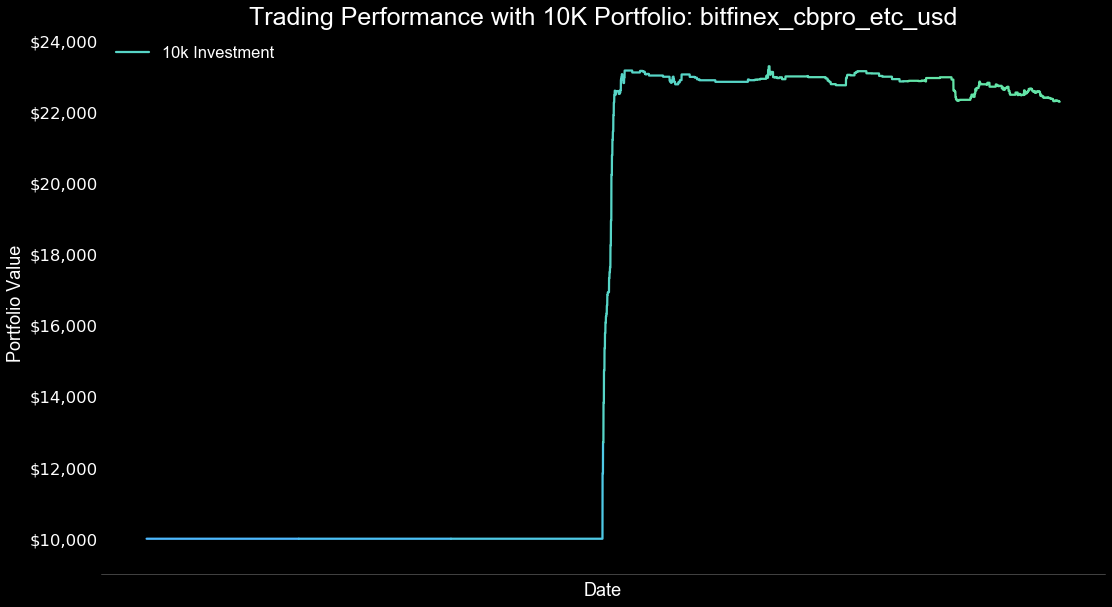

In [289]:
arb_profit_viz('bitfinex_cbpro_etc_usd', top_models_df)

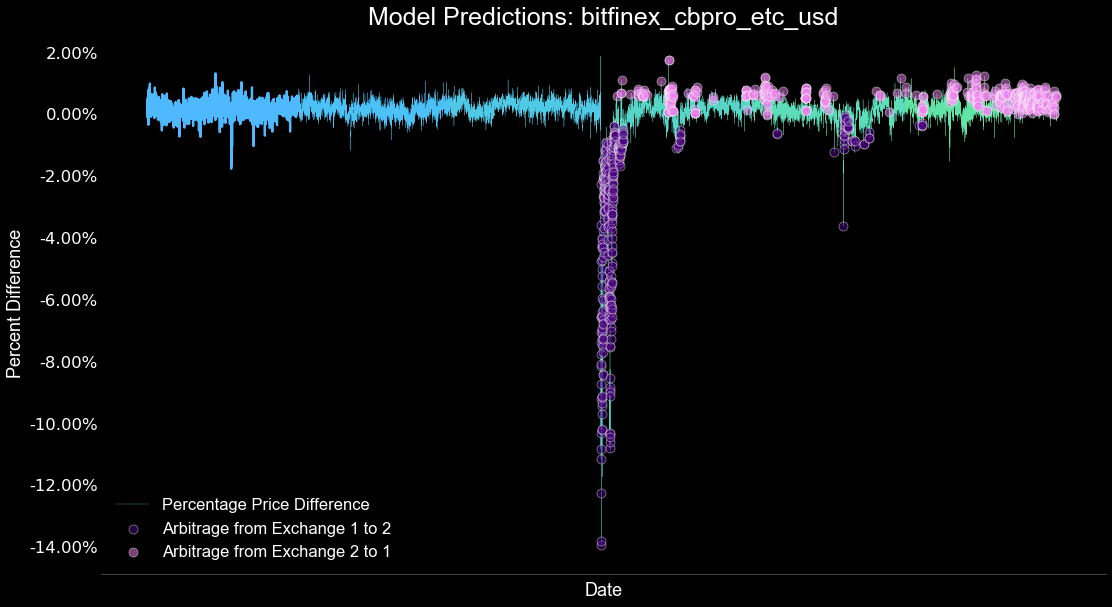

In [178]:
arb_pred_viz('bitfinex_cbpro_etc_usd', top_models_df)

#### Generate and export all visualizaions

In [310]:
# 6       
# function to create the viz for all model sets:
#         - iterate through each row in performance df 
#             - define base model
#         - call visualization function for that base model


def create_all_viz(top_models_df):
    csv_names = top_models_df['csv_name'].to_list()
#     print(csv_names)
    
    for csv_name in csv_names:
        print(csv_name, '\n')
        arb_profit_viz(csv_name, top_models_df)
        arb_pred_viz(csv_name, top_models_df)

gemini_hitbtc_bch_btc 



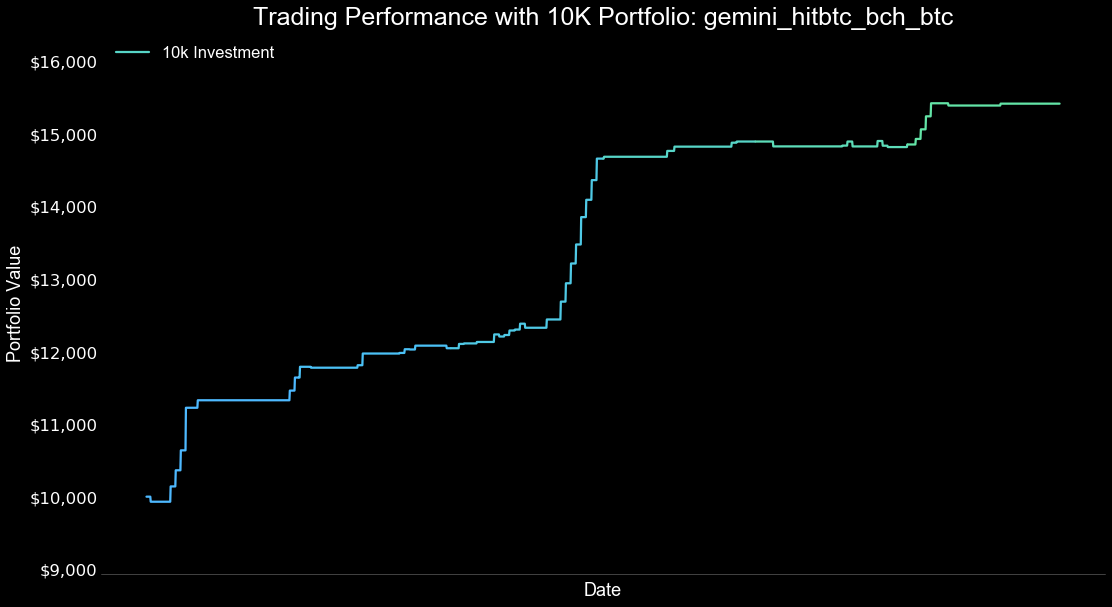

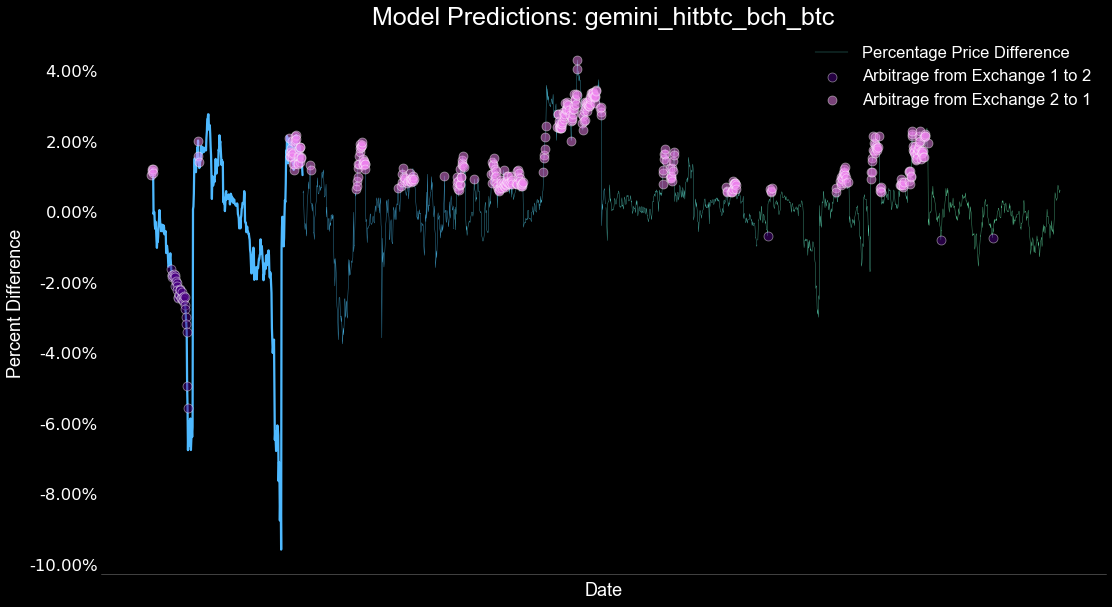

gemini_bitfinex_bch_btc 



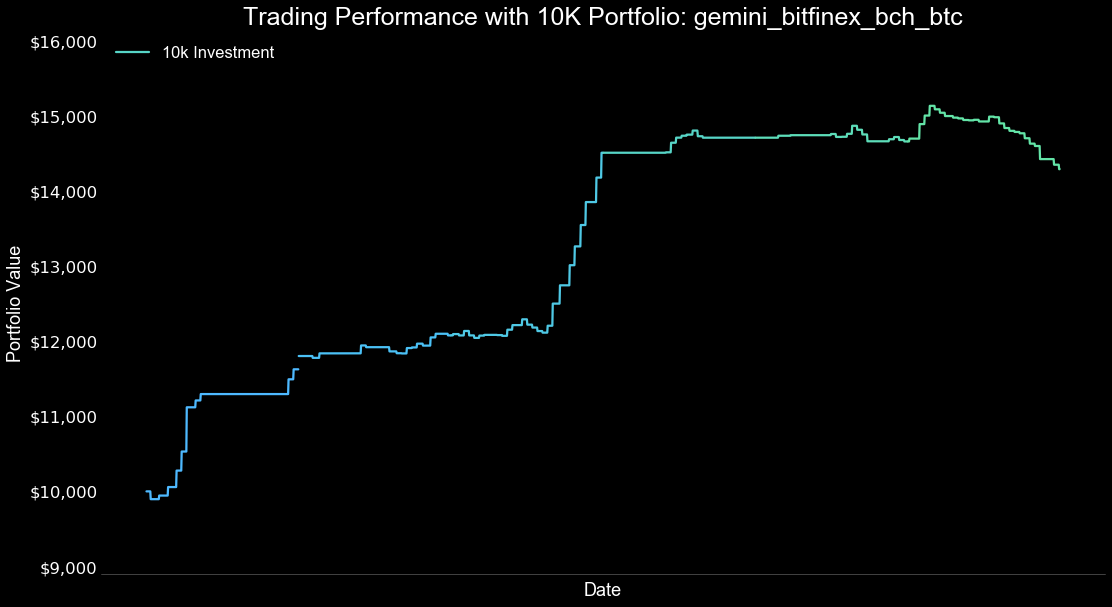

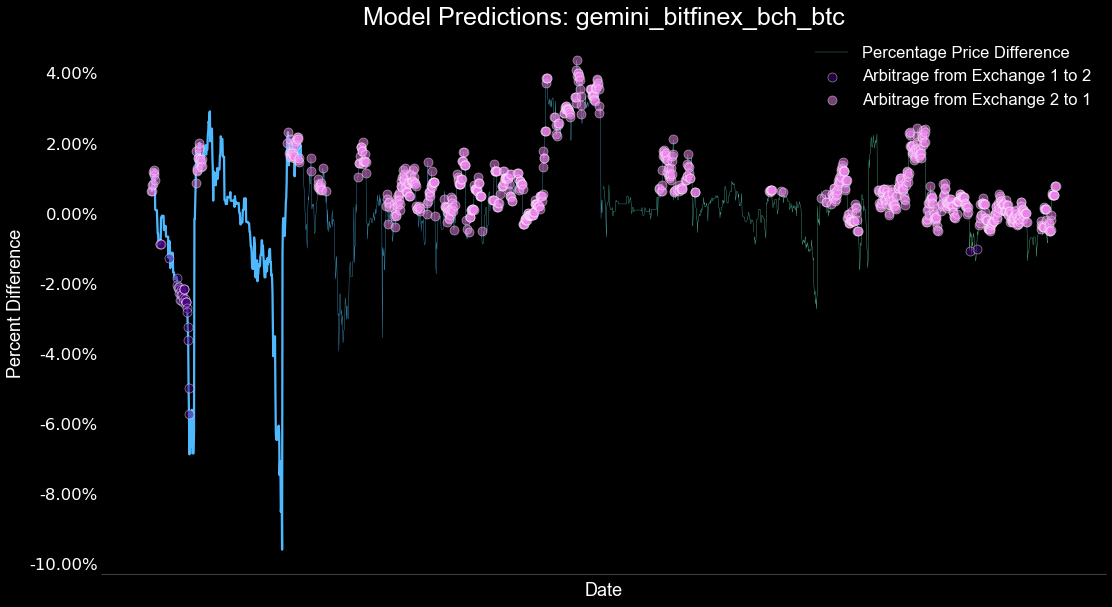

hitbtc_cbpro_eth_usdc 



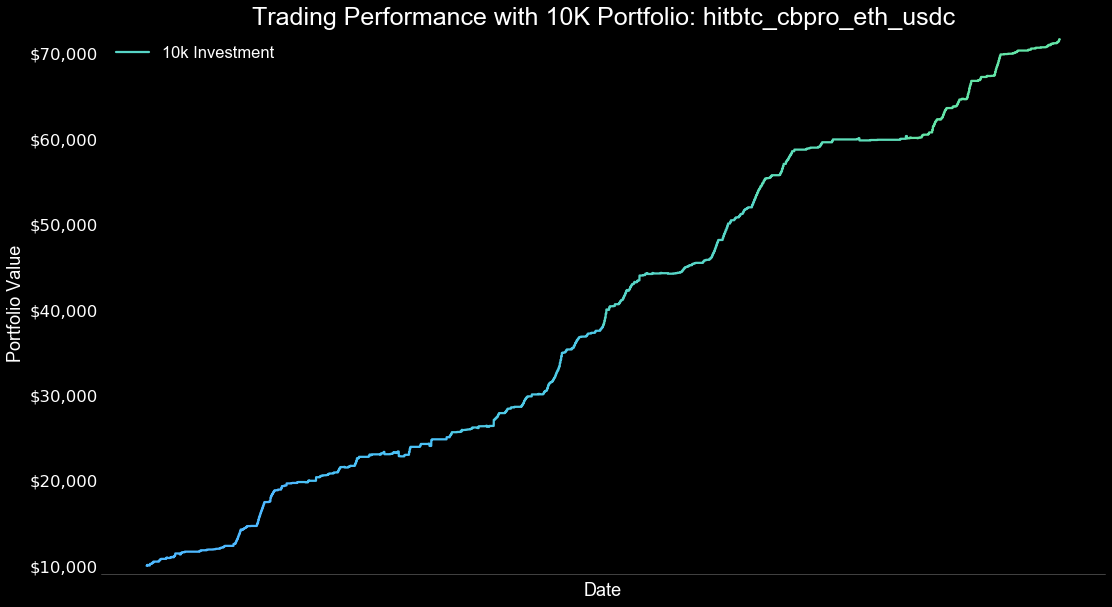

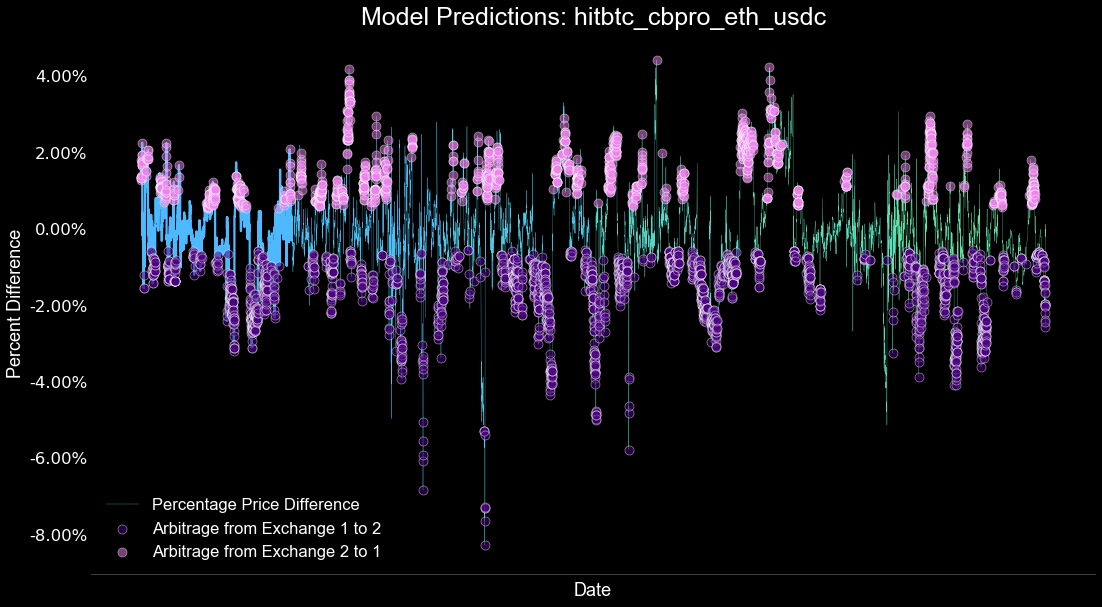

kraken_gemini_bch_btc 



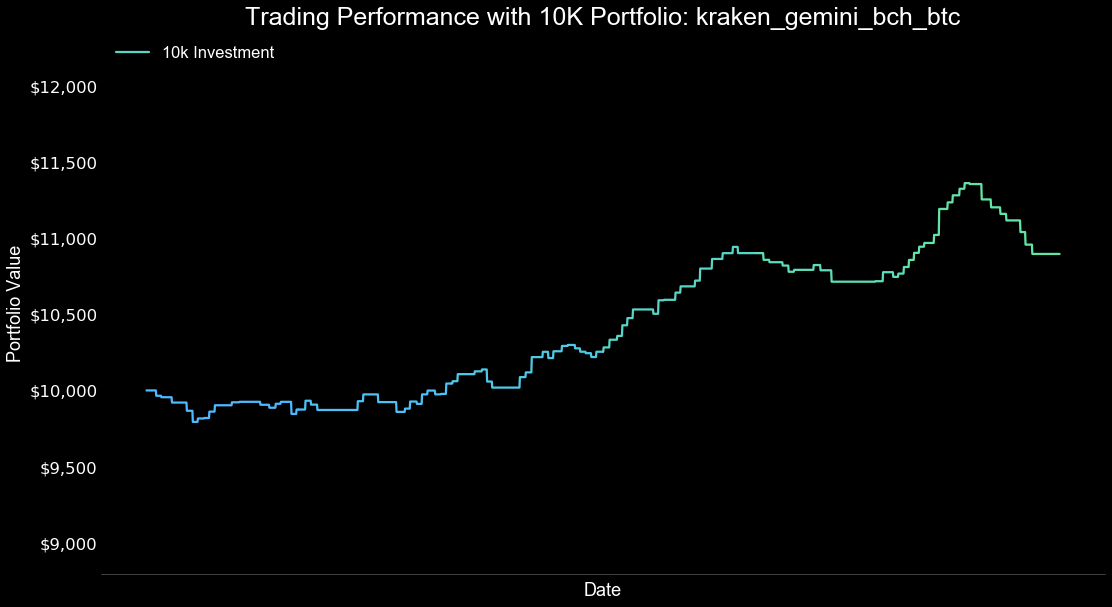

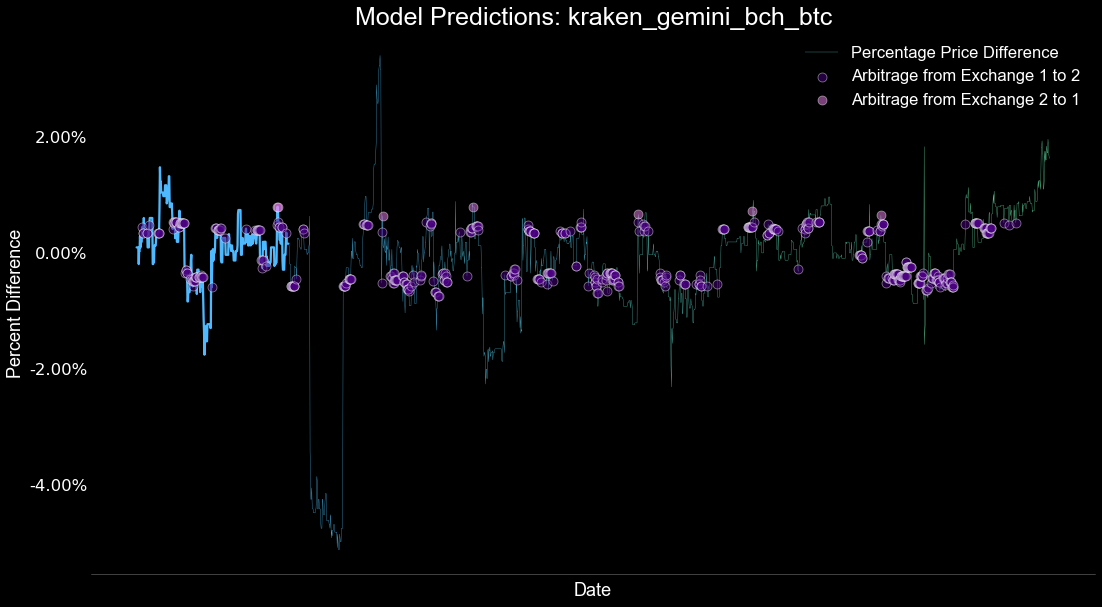

bitfinex_hitbtc_bch_usdt 



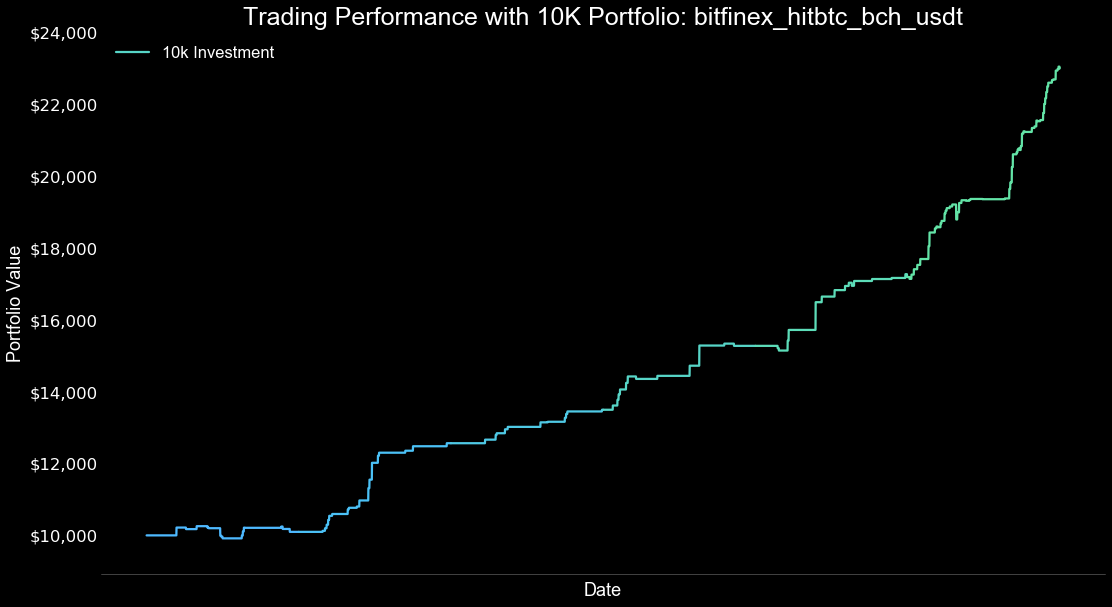

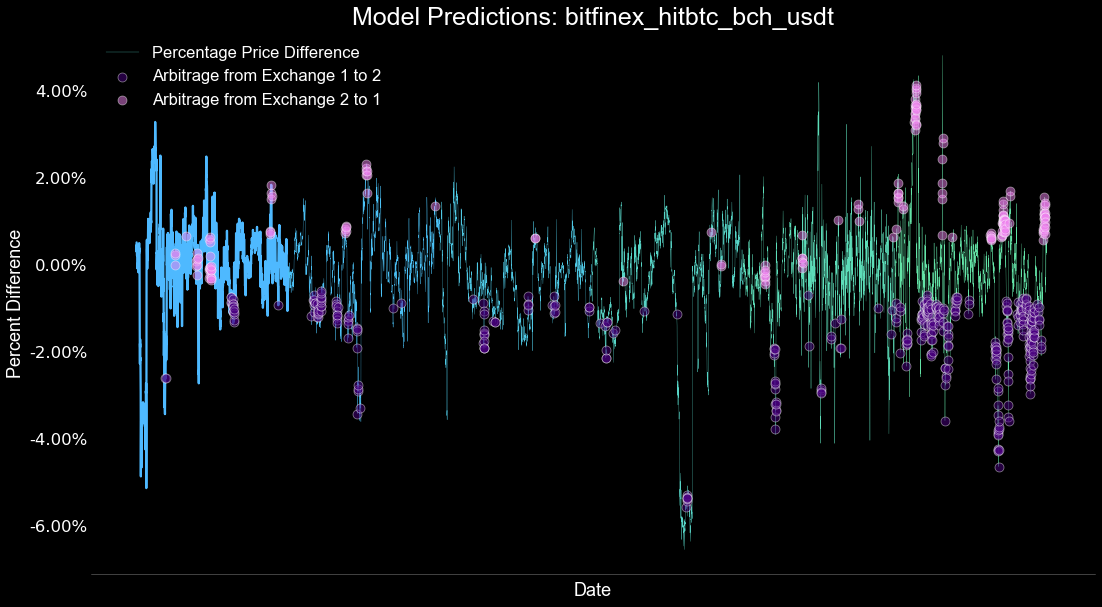

gemini_kraken_ltc_btc 



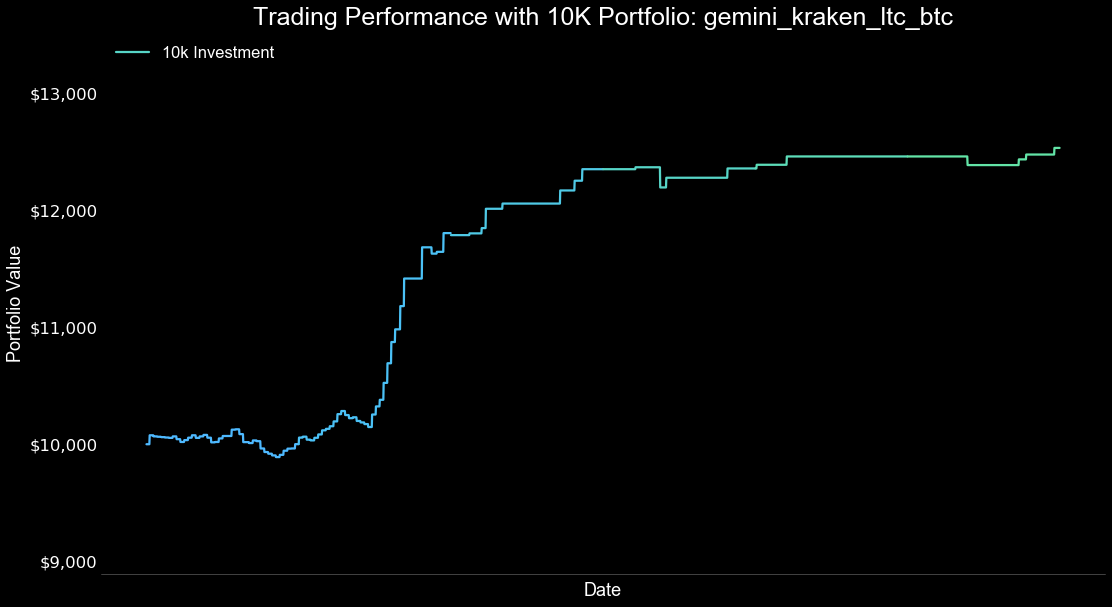

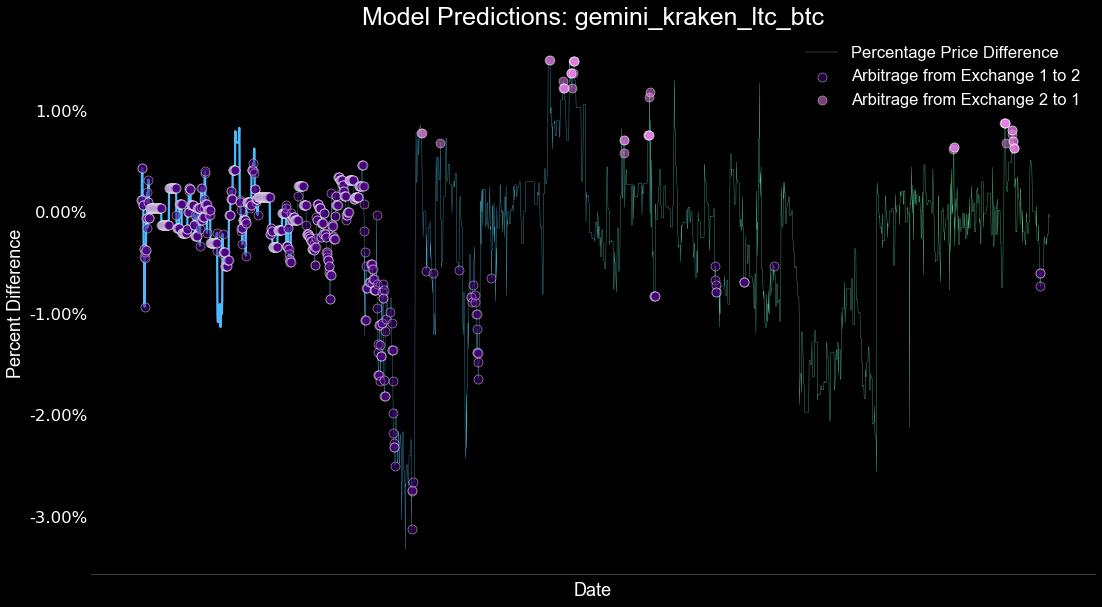

gemini_cbpro_ltc_btc 



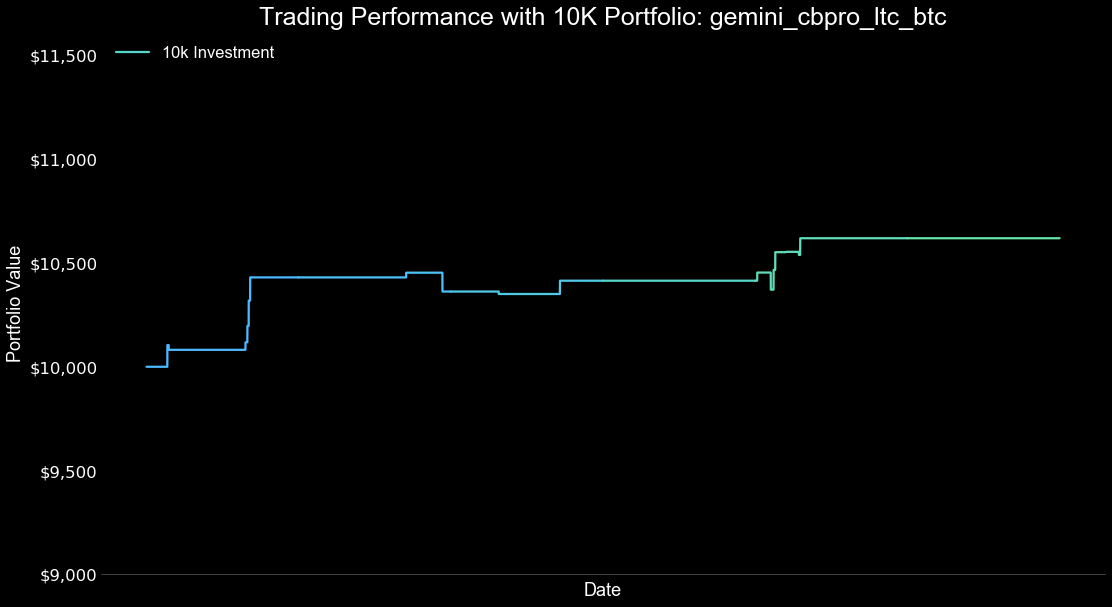

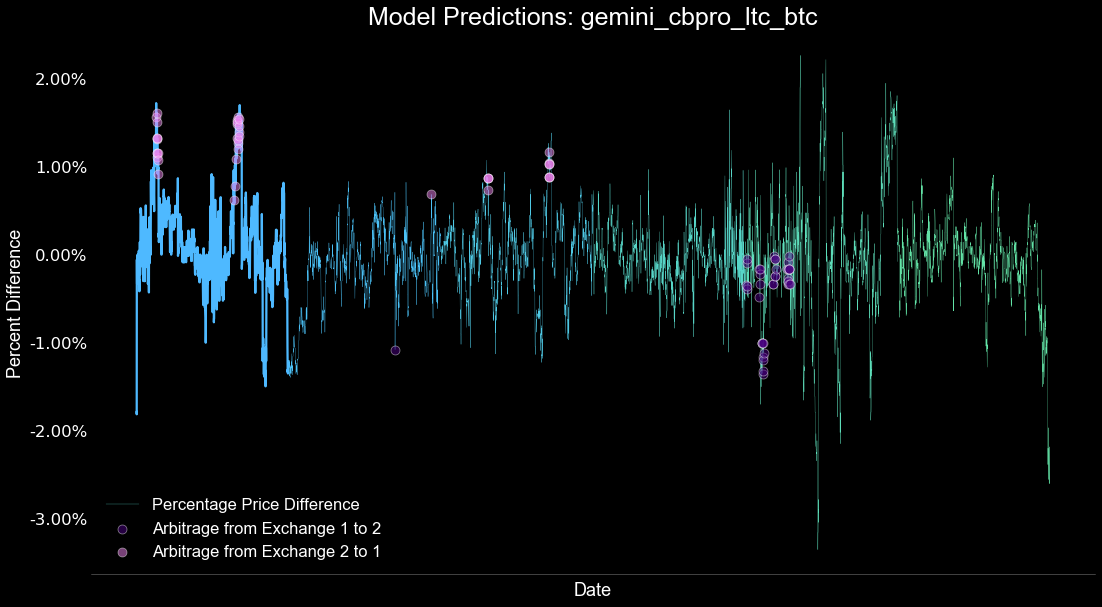

gemini_hitbtc_ltc_btc 



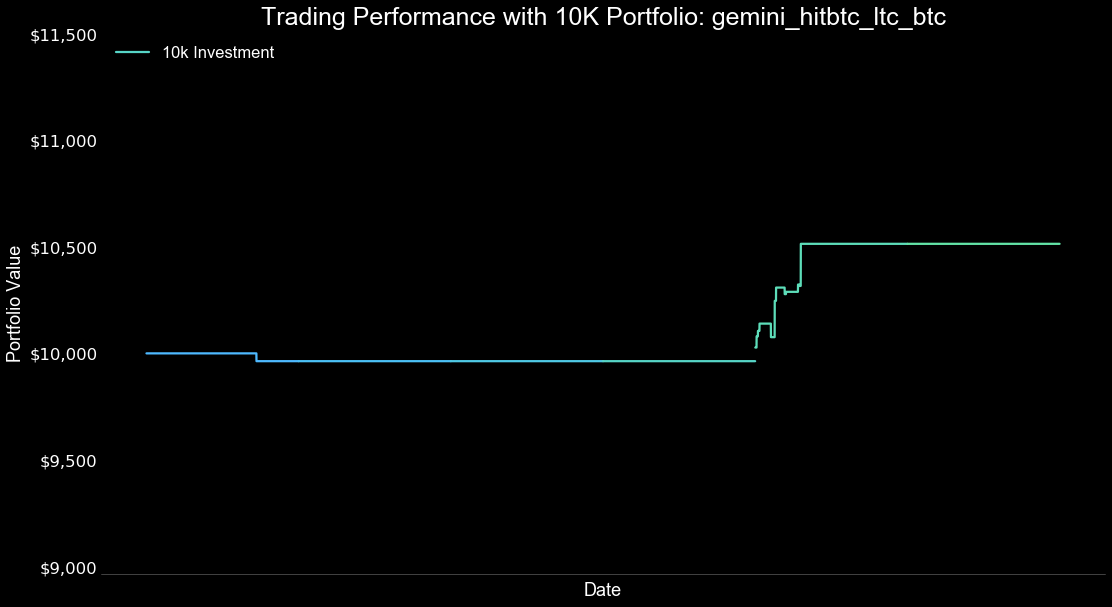

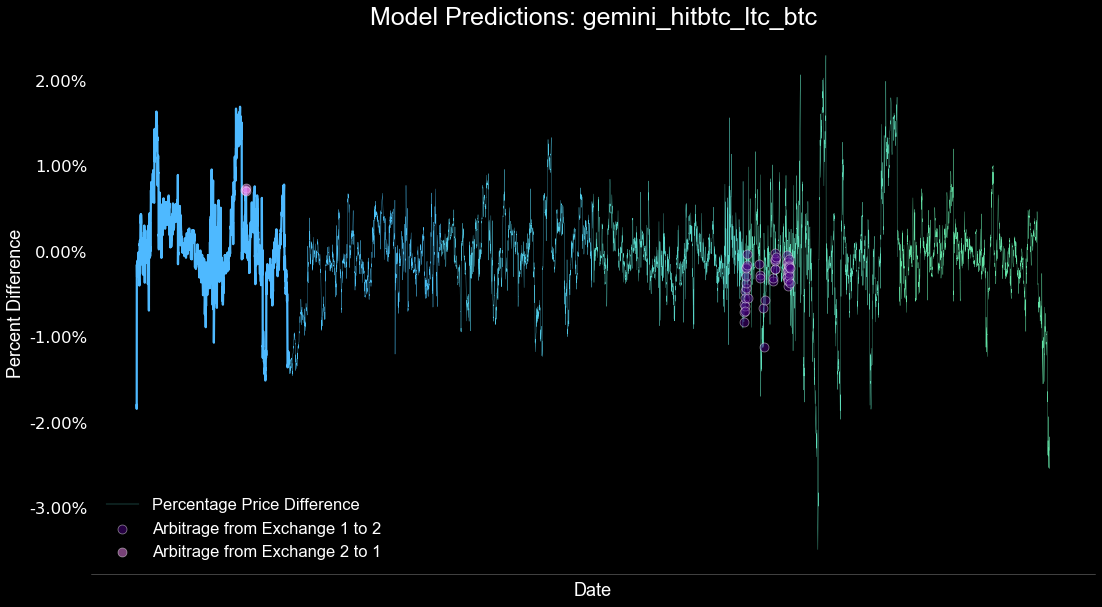

bitfinex_hitbtc_ltc_usdt 



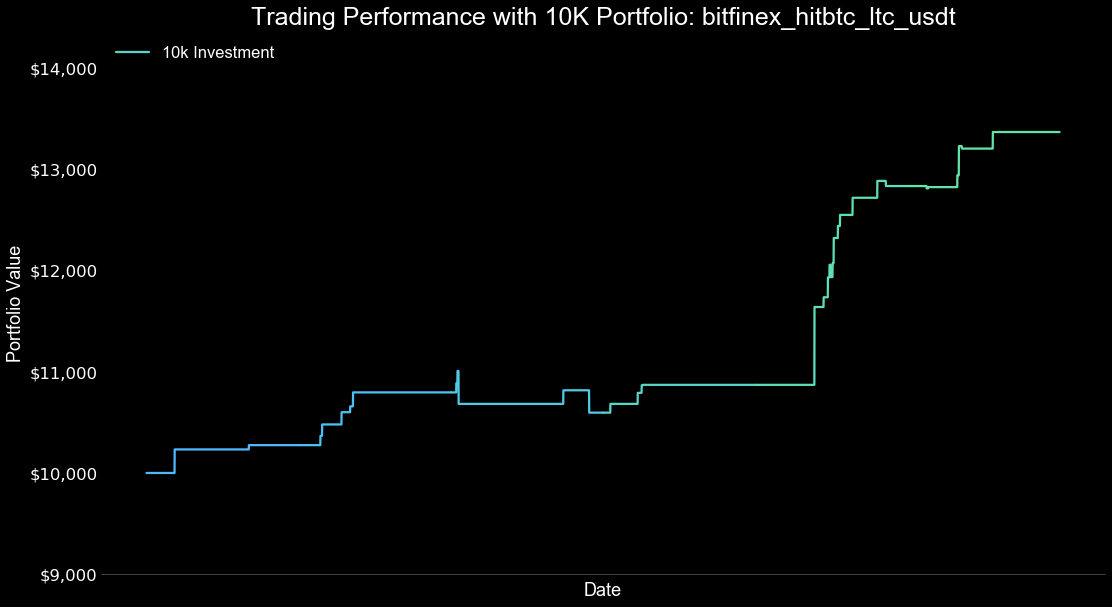

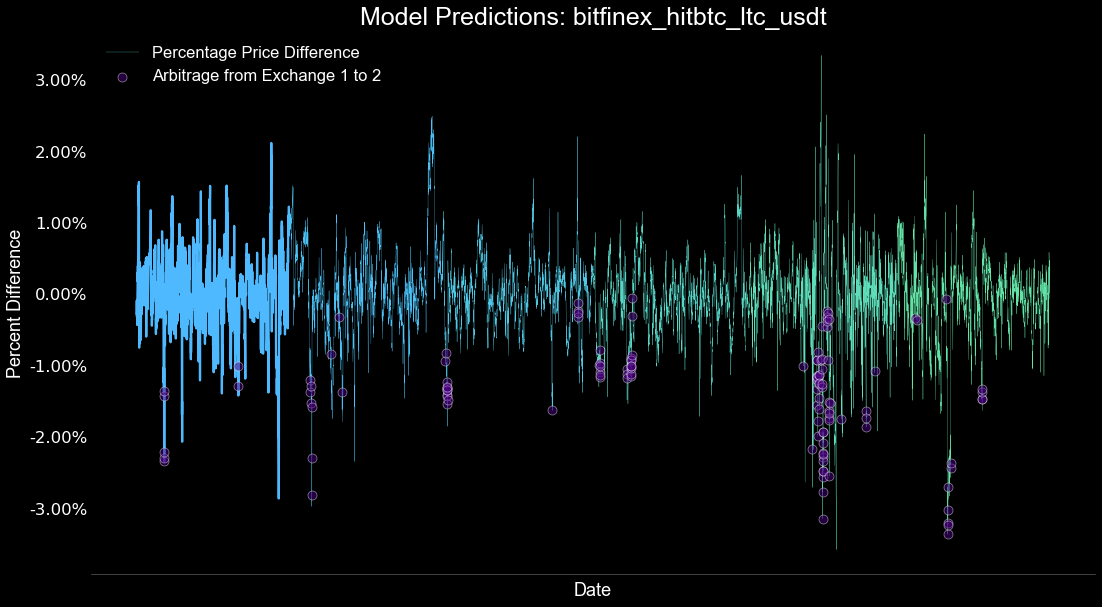

gemini_bitfinex_ltc_btc 



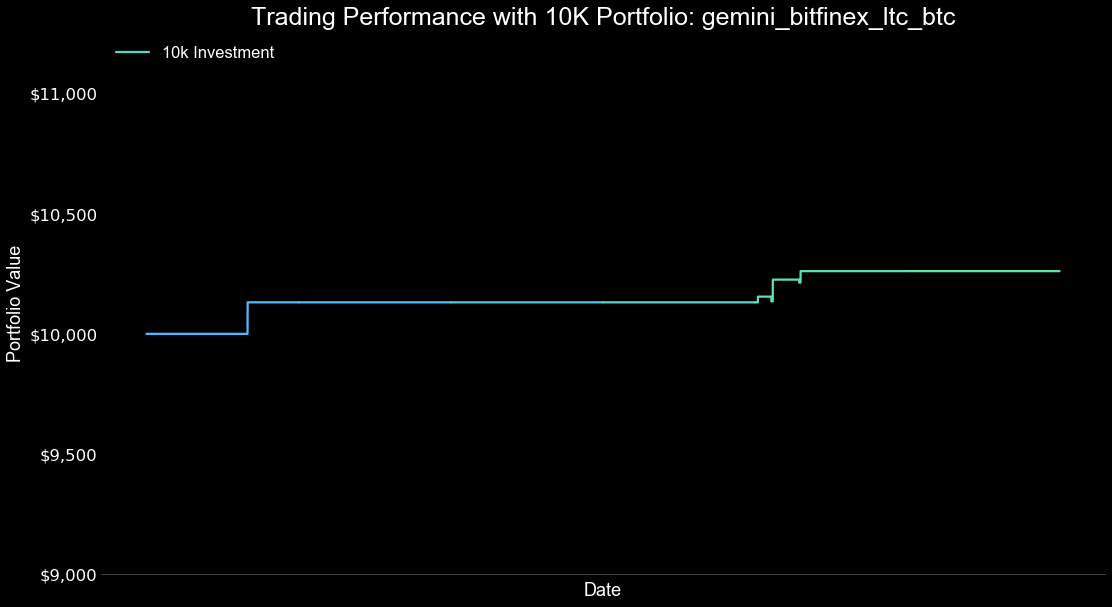

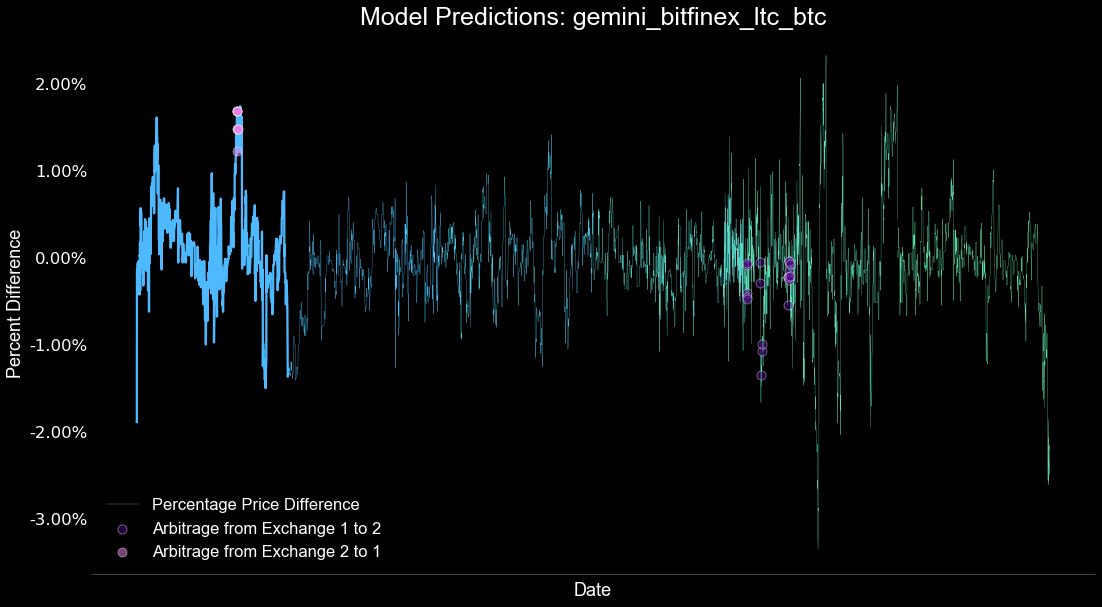

In [313]:
create_all_viz(top_models_df[5:])